In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import re

In [ ]:
df = pd.read_csv('TasasCredito.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_18840\2352330487.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TasasCredito.csv')


Cantidad de Registros del dataset

In [3]:
import pandas as pd

# Leer el archivo en partes más pequeñas (chunks)
chunk_size = 10000  # Puedes ajustar el tamaño del chunk
chunk_list = []  # Lista para almacenar los datos leídos

# Iterar sobre los chunks y añadirlos a la lista
for chunk in pd.read_csv('TasasCredito.csv', chunksize=chunk_size, low_memory=False):
    chunk_list.append(chunk)

# Concatenar todos los chunks en un solo DataFrame
df = pd.concat(chunk_list, ignore_index=True)

# Verificar el tamaño del DataFrame final
print(df.shape)

(11663117, 23)


In [ ]:
Compresion Inicial De Los Datos

C:\Users\Asus\AppData\Local\Temp\ipykernel_2968\3957693950.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TasasCredito.csv')


Estructura del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11663117 entries, 0 to 11663116
Data columns (total 23 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Tipo_Entidad                      object 
 1   Nombre_Tipo_Entidad               object 
 2   Codigo_Entidad                    float64
 3   Nombre_Entidad                    object 
 4   Fecha_Corte                       object 
 5   Tipo_de_persona                   object 
 6   Sexo                              object 
 7   Tamaño_de_empresa                 object 
 8   Tipo_de_crédito                   object 
 9   Tipo_de_garantía                  object 
 10  Producto de crédito               object 
 11  Plazo de crédito                  object 
 12  Tasa_efectiva_promedio_ponderada  float64
 13  margen_adicional                  float64
 14  Montos_desembolsados              float64
 15  Numero_de_creditos_desembolsados  float64
 16  

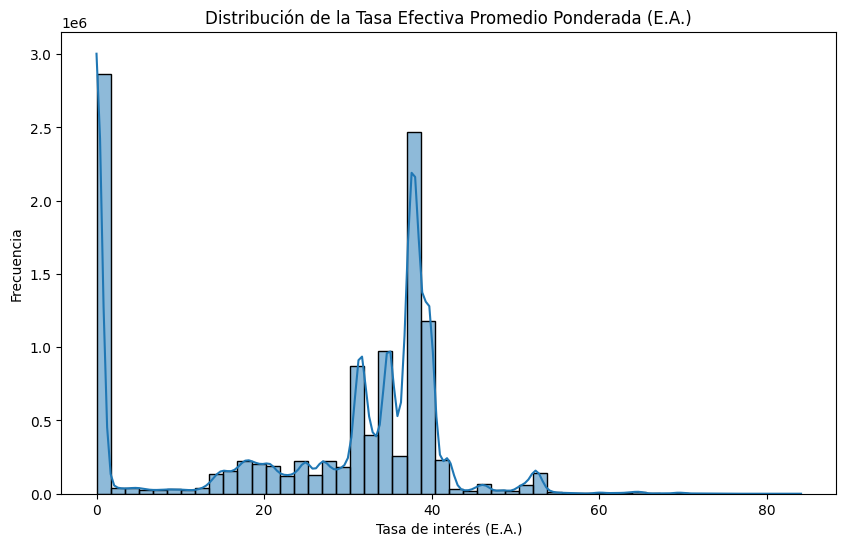

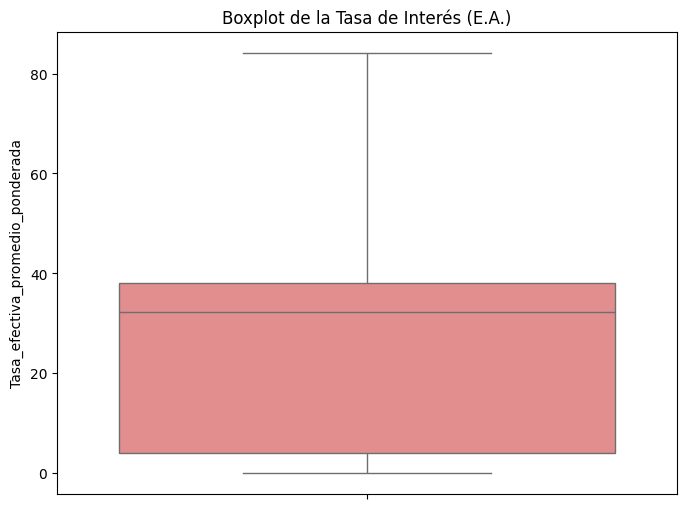


Percentiles de la tasa de interés (E.A.):
25th Percentile: 4.07
50th Percentile (Mediana): 32.33
75th Percentile: 37.99


In [4]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el conjunto de datos
# Supongamos que el archivo CSV se llama 'tarjetas_credito.csv'
df = pd.read_csv('TasasCredito.csv')

# 2. Revisión de la estructura del DataFrame
print("Estructura del conjunto de datos:")
print(df.info())

print("\nPrimeras filas del conjunto de datos:")
print(df.head())

# 3. Cálculo de estadísticas descriptivas
print("\nEstadísticas descriptivas generales:")
print(df.describe())

# 4. Identificación de valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# 5. Identificación de duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# 6. Distribución de la tasa de interés (E.A.)
# Asumiendo que 'Tasa_efectiva_promedio_ponderada' es la tasa de interés (E.A.)
print("\nDistribución de la tasa de interés (E.A.):")
print(df['Tasa_efectiva_promedio_ponderada'].describe())

# Visualización inicial de la distribución de la tasa de interés (E.A.)
plt.figure(figsize=(10, 6))
sns.histplot(df['Tasa_efectiva_promedio_ponderada'].dropna(), bins=50, kde=True)
plt.title('Distribución de la Tasa Efectiva Promedio Ponderada (E.A.)')
plt.xlabel('Tasa de interés (E.A.)')
plt.ylabel('Frecuencia')
plt.show()

# 8. Boxplot para detectar posibles outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['Tasa_efectiva_promedio_ponderada'], color='lightcoral')
plt.title('Boxplot de la Tasa de Interés (E.A.)')
plt.show()

# 9. Análisis de percentiles de la tasa de interés (E.A.)
percentiles = np.percentile(df['Tasa_efectiva_promedio_ponderada'].dropna(), [25, 50, 75])
print("\nPercentiles de la tasa de interés (E.A.):")
print("25th Percentile:", percentiles[0])
print("50th Percentile (Mediana):", percentiles[1])
print("75th Percentile:", percentiles[2])

# Fin del análisis inicial

Identificar como se encuentran los datos

In [ ]:
df.head()

,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,...,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Grupo_Etnico,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,1,BC-ESTABLECIMIENTO BANCARIO,1.0,Banco de Bogotá,03/05/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,...,0.0,40920.0,1.0,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor nuevo en la entidad,6820.0,5045.0
1,1,BC-ESTABLECIMIENTO BANCARIO,1.0,Banco de Bogotá,03/05/2024,Natural,Masculino,Microempresa,Comercial ordinario,Sin garantia,...,0.0,6000000.0,1.0,Sin información (1),No aplica(1),FS,Mayor a 3 SMLMV menor o igual a 5 SMLMV,Deudor nuevo en la entidad,4644.0,11001.0
2,1,BC-ESTABLECIMIENTO BANCARIO,1.0,Banco de Bogotá,03/05/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,...,0.0,132785.0,2.0,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,9002.0,11001.0
3,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,03/05/2024,Natural,Masculino,No aplica,Consumo,Garantia idónea o no idónea,...,0.0,100000.0,1.0,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8512.0,68001.0
4,1,BC-ESTABLECIMIENTO BANCARIO,39.0,Banco Davivienda,26/04/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,...,0.0,67687.0,1.0,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,129.0,11001.0


In [ ]:
df.shape()

Eliminacion De Duplicados

In [5]:
import pandas as pd

# Leer el archivo en fragmentos
chunk_size = 10000  # Ajusta el tamaño del fragmento según tu memoria
chunks = pd.read_csv('TasasCredito.csv', chunksize=chunk_size, low_memory=False)

# Combinar todos los fragmentos en un DataFrame
df = pd.concat(chunks)

# Continuar con el proceso de eliminación de duplicados
print("Número de filas antes de eliminar duplicados:", len(df))
df_sin_duplicados = df.drop_duplicates()
print("Número de filas después de eliminar duplicados:", len(df_sin_duplicados))

# Guardar el DataFrame sin duplicados en un nuevo archivo
df_sin_duplicados.to_csv('TasasCreditoV1.csv', index=False)

# Verificar cuántos duplicados se eliminaron
num_duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas eliminadas: {num_duplicados}")

Número de filas antes de eliminar duplicados: 11663117
Número de filas después de eliminar duplicados: 11663097
Número de filas duplicadas eliminadas: 20


Revisión de Nombres de Columnas:

In [ ]:
import pandas as pd
import re
import unidecode

def check_and_correct_column_names(df):
    # Definir un patrón para nombres de columnas válidos (alfanuméricos y guiones bajos)
    valid_column_name_pattern = re.compile(r'^[a-zA-Z0-9_]+$')

    # Obtener los nombres originales de las columnas
    original_columns = df.columns.tolist()
    print("Original column names:")
    print(original_columns)

    # Función para corregir los nombres de columnas
    def correct_column_name(name):
        # Remover acentos y reemplazar ñ por n
        name = unidecode.unidecode(name)
        # Reemplazar caracteres no alfanuméricos por guiones bajos
        corrected_name = re.sub(r'[^\w]', '_', name)
        # Convertir a minúsculas para mantener consistencia
        corrected_name = corrected_name.lower()
        return corrected_name

    # Crear una lista de nombres de columnas corregidos
    corrected_columns = [correct_column_name(col) for col in original_columns]

    # Verificar y corregir nombres de columnas
    new_column_names = []
    for col in corrected_columns:
        if not valid_column_name_pattern.match(col):
            print(f"Invalid column name detected: {col}")
        new_column_names.append(col)

    # Aplicar los nombres corregidos al DataFrame
    df.columns = new_column_names

    print("Corrected column names:")
    print(df.columns.tolist())

    return df

# Leer el archivo CSV en un DataFrame
file_path = 'TasasCredito.csv'
df = pd.read_csv(file_path)

# Aplicar la función para corregir los nombres de las columnas
df = check_and_correct_column_names(df)

# Guardar el DataFrame con los nombres de columna corregidos en un nuevo archivo CSV (opcional)
df.to_csv('TasasCredito_V01.csv', index=False)


C:\Users\Asus\AppData\Local\Temp\ipykernel_18840\601442028.py:44: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Original column names:
['Tipo_Entidad', 'Nombre_Tipo_Entidad', 'Codigo_Entidad', 'Nombre_Entidad', 'Fecha_Corte', 'Tipo_de_persona', 'Sexo', 'Tamaño_de_empresa', 'Tipo_de_crédito', 'Tipo_de_garantía', 'Producto de crédito', 'Plazo de crédito', 'Tasa_efectiva_promedio_ponderada', 'margen_adicional', 'Montos_desembolsados', 'Numero_de_creditos_desembolsados', 'Grupo_Etnico', 'Antiguedad_de_la_empresa', 'Tipo_de_Tasa', 'Rango_monto_desembolsado', 'Clase_deudor', 'Codigo_CIIU', 'Codigo_Municipio']
Corrected column names:
['tipo_entidad', 'nombre_tipo_entidad', 'codigo_entidad', 'nombre_entidad', 'fecha_corte', 'tipo_de_persona', 'sexo', 'tamano_de_empresa', 'tipo_de_credito', 'tipo_de_garantia', 'producto_de_credito', 'plazo_de_credito', 'tasa_efectiva_promedio_ponderada', 'margen_adicional', 'montos_desembolsados', 'numero_de_creditos_desembolsados', 'grupo_etnico', 'antiguedad_de_la_empresa', 'tipo_de_tasa', 'rango_monto_desembolsado', 'clase_deudor', 'codigo_ciiu', 'codigo_municipio']


Revision de los Valores Nulos:

In [6]:
import pandas as pd

def check_missing_values(file_path):
    # Leer el archivo CSV en chunks
    chunk_size = 10000  # Número de filas por chunk
    missing_values_summary = pd.Series(dtype=int)

    for chunk in pd.read_csv(file_path, low_memory=False, chunksize=chunk_size):
        # Sumar los valores nulos de cada chunk
        missing_values = chunk.isnull().sum()
        missing_values_summary = missing_values_summary.add(missing_values, fill_value=0)

    # Mostrar el conteo de valores nulos en cada columna
    print("Conteo de valores nulos en cada columna:")
    print(missing_values_summary)

    # Mostrar las columnas que tienen valores nulos
    columns_with_missing_values = missing_values_summary[missing_values_summary > 0]

    if not columns_with_missing_values.empty:
        print("\nColumnas con valores nulos:")
        print(columns_with_missing_values)
    else:
        print("\nNo se encontraron valores nulos en ninguna columna.")

# Definir el archivo CSV
file_path = 'TasasCredito_V01.csv'

# Aplicar la función para verificar valores nulos
check_missing_values(file_path)


Conteo de valores nulos en cada columna:
antiguedad_de_la_empresa            251293.0
clase_deudor                        251293.0
codigo_ciiu                         251293.0
codigo_entidad                           4.0
codigo_municipio                    251293.0
fecha_corte                              4.0
grupo_etnico                        251293.0
margen_adicional                         5.0
montos_desembolsados                     5.0
nombre_entidad                           4.0
nombre_tipo_entidad                      4.0
numero_de_creditos_desembolsados         5.0
plazo_de_credito                         6.0
producto_de_credito                      8.0
rango_monto_desembolsado            251293.0
sexo                                     5.0
tamano_de_empresa                        5.0
tasa_efectiva_promedio_ponderada         5.0
tipo_de_credito                          5.0
tipo_de_garantia                         5.0
tipo_de_persona                          5.0
tipo_de_tasa  

Identificacion de las filas donde la columna 'tasa_efectiva_promedio_ponderada' tiene datos faltantes

In [ ]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
file_path = 'TasasCredito_V01.csv'
df = pd.read_csv(file_path, low_memory=False)

# Filtrar filas con valores nulos en 'tasa_efectiva_promedio_ponderada'
nulos_tasa_efectiva = df[df['tasa_efectiva_promedio_ponderada'].isnull()]

# Mostrar toda la información de las filas con valores nulos
print("Filas con valores nulos en 'tasa_efectiva_promedio_ponderada':")
print(nulos_tasa_efectiva)

# Opcional: Si la tabla es muy grande y quieres ver un número limitado de filas
# print(nulos_tasa_efectiva.head(10))  # Muestra solo las primeras 10 filas


Filas con valores nulos en 'tasa_efectiva_promedio_ponderada':
                            tipo_entidad          nombre_tipo_entidad  \
11663112                               1  BC-ESTABLECIMIENTO BANCARIO   
11663113                  "error" : true                          NaN   
11663114    "message" : "Internal error"                          NaN   
11663115                  "status" : 500                          NaN   
11663116                               }                          NaN   

          codigo_entidad    nombre_entidad fecha_corte tipo_de_persona  \
11663112            39.0  Banco Davivienda  26/01/2024         Natural   
11663113             NaN               NaN         NaN             NaN   
11663114             NaN               NaN         NaN             NaN   
11663115             NaN               NaN         NaN             NaN   
11663116             NaN               NaN         NaN             NaN   

              sexo tamano_de_empresa tipo_de_credito 

Identificar y comparar los valores nulos

In [7]:
import pandas as pd

def check_nulls_comparison(file_path, columns):
    # Inicializar un diccionario para almacenar el conteo de nulos y los índices
    null_counts = {col: 0 for col in columns}
    indices_with_nulls = {col: [] for col in columns}

    # Leer el archivo CSV en fragmentos
    chunks = pd.read_csv(file_path, low_memory=False, chunksize=10000)  # Cambia el tamaño según lo necesites

    # Iterar sobre los fragmentos
    for chunk in chunks:
        # Verificar valores nulos en las columnas especificadas
        nulls = chunk[columns].isnull()

        # Contar nulos en cada columna
        for col in columns:
            null_count = nulls[col].sum()
            null_counts[col] += null_count
            indices_with_nulls[col].extend(chunk[chunk[col].isnull()].index.tolist())

    # Mostrar el conteo de valores nulos en cada columna
    print("Conteo de valores nulos en cada columna:")
    for col, count in null_counts.items():
        print(f"{col}: {count}")

    # Mostrar los índices con valores nulos en cada columna
    for col in columns:
        print(f"\nÍndices con valores nulos en '{col}':")
        print(indices_with_nulls[col])

    # Comparar valores nulos entre todas las columnas especificadas
    all_nulls_same = True
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            # Re-lectura en fragmentos para la comparación de nulos
            for chunk in pd.read_csv(file_path, low_memory=False, chunksize=10000):
                if not all(chunk[col1].isnull() == chunk[col2].isnull()):
                    print(f"\nLos valores nulos en '{col1}' y '{col2}' NO son idénticos.")
                    all_nulls_same = False
                    break
            if not all_nulls_same:
                break
        if not all_nulls_same:
            break

    if all_nulls_same:
        print("\nLos valores nulos en todas las columnas especificadas son idénticos.")
    else:
        print("\nLos valores nulos en algunas columnas especificadas NO son idénticos.")

# Definir la ruta del archivo CSV
file_path = 'TasasCredito_V01.csv'

# Definir las columnas para analizar
columns_to_check = [
    'nombre_tipo_entidad', 'codigo_entidad', 'nombre_entidad', 'fecha_corte',
    'tipo_de_persona', 'sexo', 'tamano_de_empresa', 'tipo_de_credito',
    'tipo_de_garantia', 'producto_de_credito', 'plazo_de_credito',
    'tasa_efectiva_promedio_ponderada', 'margen_adicional',
    'montos_desembolsados', 'numero_de_creditos_desembolsados'
]

# Aplicar la función para comparar los valores nulos en las columnas especificadas
check_nulls_comparison(file_path, columns_to_check)

Conteo de valores nulos en cada columna:
nombre_tipo_entidad: 4
codigo_entidad: 4
nombre_entidad: 4
fecha_corte: 4
tipo_de_persona: 5
sexo: 5
tamano_de_empresa: 5
tipo_de_credito: 5
tipo_de_garantia: 5
producto_de_credito: 8
plazo_de_credito: 6
tasa_efectiva_promedio_ponderada: 5
margen_adicional: 5
montos_desembolsados: 5
numero_de_creditos_desembolsados: 5

Índices con valores nulos en 'nombre_tipo_entidad':
[11663093, 11663094, 11663095, 11663096]

Índices con valores nulos en 'codigo_entidad':
[11663093, 11663094, 11663095, 11663096]

Índices con valores nulos en 'nombre_entidad':
[11663093, 11663094, 11663095, 11663096]

Índices con valores nulos en 'fecha_corte':
[11663093, 11663094, 11663095, 11663096]

Índices con valores nulos en 'tipo_de_persona':
[5706816, 11663093, 11663094, 11663095, 11663096]

Índices con valores nulos en 'sexo':
[5706816, 11663093, 11663094, 11663095, 11663096]

Índices con valores nulos en 'tamano_de_empresa':
[5706816, 11663093, 11663094, 11663095, 116

Diccionario

In [8]:
import pandas as pd

def check_nulls_comparison(df, columns):
    # Verificar valores nulos en las columnas especificadas
    nulls = df[columns].isnull()

    # Mostrar el conteo de valores nulos en cada columna
    print("Conteo de valores nulos en cada columna:")
    print(nulls.sum())

    # Inicializar un diccionario para almacenar los índices con valores nulos
    indices_with_nulls = {col: df[df[col].isnull()].index.tolist() for col in columns}

    # Mostrar los índices con valores nulos en cada columna
    print("\nDiccionario de índices con valores nulos en cada columna:")
    print(indices_with_nulls)  # Mostrar el diccionario completo

    # Mostrar los índices de forma más legible
    for col in columns:
        print(f"\nÍndices con valores nulos en '{col}':")
        print(indices_with_nulls[col])

    # Comparar valores nulos entre todas las columnas especificadas
    all_nulls_same = True
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            if not all(df[col1].isnull() == df[col2].isnull()):
                print(f"\nLos valores nulos en '{col1}' y '{col2}' NO son idénticos.")
                all_nulls_same = False
                break
        if not all_nulls_same:
            break

    if all_nulls_same:
        print("\nLos valores nulos en todas las columnas especificadas son idénticos.")
    else:
        print("\nLos valores nulos en algunas columnas especificadas NO son idénticos.")

# Leer el archivo CSV en un DataFrame
file_path = 'TasasCredito_V01.csv'
df = pd.read_csv(file_path, low_memory=False)

# Definir las columnas para analizar
columns_to_check = [
    'nombre_tipo_entidad', 'codigo_entidad', 'nombre_entidad', 'fecha_corte',
    'tipo_de_persona', 'sexo', 'tamano_de_empresa', 'tipo_de_credito',
    'tipo_de_garantia', 'producto_de_credito', 'plazo_de_credito',
    'tasa_efectiva_promedio_ponderada', 'margen_adicional',
    'montos_desembolsados', 'numero_de_creditos_desembolsados'
]

# Aplicar la función para comparar los valores nulos en las columnas especificadas
check_nulls_comparison(df, columns_to_check)

Conteo de valores nulos en cada columna:
nombre_tipo_entidad                 4
codigo_entidad                      4
nombre_entidad                      4
fecha_corte                         4
tipo_de_persona                     5
sexo                                5
tamano_de_empresa                   5
tipo_de_credito                     5
tipo_de_garantia                    5
producto_de_credito                 8
plazo_de_credito                    6
tasa_efectiva_promedio_ponderada    5
margen_adicional                    5
montos_desembolsados                5
numero_de_creditos_desembolsados    5
dtype: int64

Diccionario de índices con valores nulos en cada columna:
{'nombre_tipo_entidad': [11663093, 11663094, 11663095, 11663096], 'codigo_entidad': [11663093, 11663094, 11663095, 11663096], 'nombre_entidad': [11663093, 11663094, 11663095, 11663096], 'fecha_corte': [11663093, 11663094, 11663095, 11663096], 'tipo_de_persona': [5706816, 11663093, 11663094, 11663095, 11663096], 'sex

Eliminacion de los valores nulos, se elimino porque todos los valores pertenece a la misma fila

In [9]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
file_path = 'TasasCredito_V01.csv'
df = pd.read_csv(file_path, low_memory=False)

# Columnas a verificar para eliminar filas con valores nulos
columns_with_nulls = [
    'nombre_tipo_entidad', 'codigo_entidad', 'nombre_entidad', 'fecha_corte',
    'tipo_de_persona', 'sexo', 'tamano_de_empresa', 'tipo_de_credito',
    'tipo_de_garantia', 'producto_de_credito', 'plazo_de_credito',
    'tasa_efectiva_promedio_ponderada', 'margen_adicional',
    'montos_desembolsados', 'numero_de_creditos_desembolsados'
]

# Eliminar filas que contengan valores nulos en las columnas especificadas
df_cleaned = df.dropna(subset=columns_with_nulls)

# Guardar el DataFrame limpio en un nuevo archivo CSV
cleaned_file_path = 'TasasCredito_V02.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

# Mostrar el conteo de valores nulos después de la limpieza
print("Conteo de valores nulos después de eliminar filas:")
print(df_cleaned.isnull().sum())

Conteo de valores nulos después de eliminar filas:
tipo_entidad                             0
nombre_tipo_entidad                      0
codigo_entidad                           0
nombre_entidad                           0
fecha_corte                              0
tipo_de_persona                          0
sexo                                     0
tamano_de_empresa                        0
tipo_de_credito                          0
tipo_de_garantia                         0
producto_de_credito                      0
plazo_de_credito                         0
tasa_efectiva_promedio_ponderada         0
margen_adicional                         0
montos_desembolsados                     0
numero_de_creditos_desembolsados         0
grupo_etnico                        251287
antiguedad_de_la_empresa            251287
tipo_de_tasa                        251287
rango_monto_desembolsado            251287
clase_deudor                        251287
codigo_ciiu                         251287
cod

Comparacion de los valores nulos entre varias columnas de un archivo CSV y realiza las siguientes acciones:

- Identificar los índices que tienen valores nulos para cada columna.
- Comparar si los índices nulos son iguales entre todas las columnas.
- Si no son iguales, muestra los índices únicos con valores nulos por columna.

In [10]:
import pandas as pd

def compare_nulls(file_path, columns_to_check):
    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(file_path, low_memory=False)

    # Diccionario para almacenar los índices con valores nulos para cada columna
    null_indices = {}

    # Identificar los índices con valores nulos para cada columna especificada
    for column in columns_to_check:
        if column in df.columns:
            null_indices[column] = set(df[df[column].isnull()].index.tolist())
        else:
            print(f"Columna '{column}' no encontrada en el DataFrame.")
            null_indices[column] = set()

    # Comparar los conjuntos de índices nulos entre las columnas
    all_null_indices = null_indices[columns_to_check[0]]

    # Determinar si todos los conjuntos de índices nulos son iguales
    all_same = all(null_indices[col] == all_null_indices for col in columns_to_check)

    # Mostrar los resultados de la comparación
    if all_same:
        print("Todas las columnas tienen los mismos índices con valores nulos.")
    else:
        print("Las columnas NO tienen los mismos índices con valores nulos.")

        # Mostrar los índices únicos en cada columna para comparación
        for column, indices in null_indices.items():
            print(f"\nÍndices únicos con valores nulos en '{column}':")
            print(sorted(indices)[:20])  # Mostrar solo los primeros 20 índices para evitar desbordamiento

# Definir el archivo CSV y las columnas a verificar
file_path = 'TasasCredito_V02.csv'
columns_to_check = [
    'grupo_etnico',
    'antiguedad_de_la_empresa',
    'tipo_de_tasa',
    'rango_monto_desembolsado',
    'clase_deudor',
    'codigo_ciiu',
    'codigo_municipio'
]

# Ejecutar la función para comparar los valores nulos
compare_nulls(file_path, columns_to_check)


Todas las columnas tienen los mismos índices con valores nulos.


Graficación de cada una de las columnas

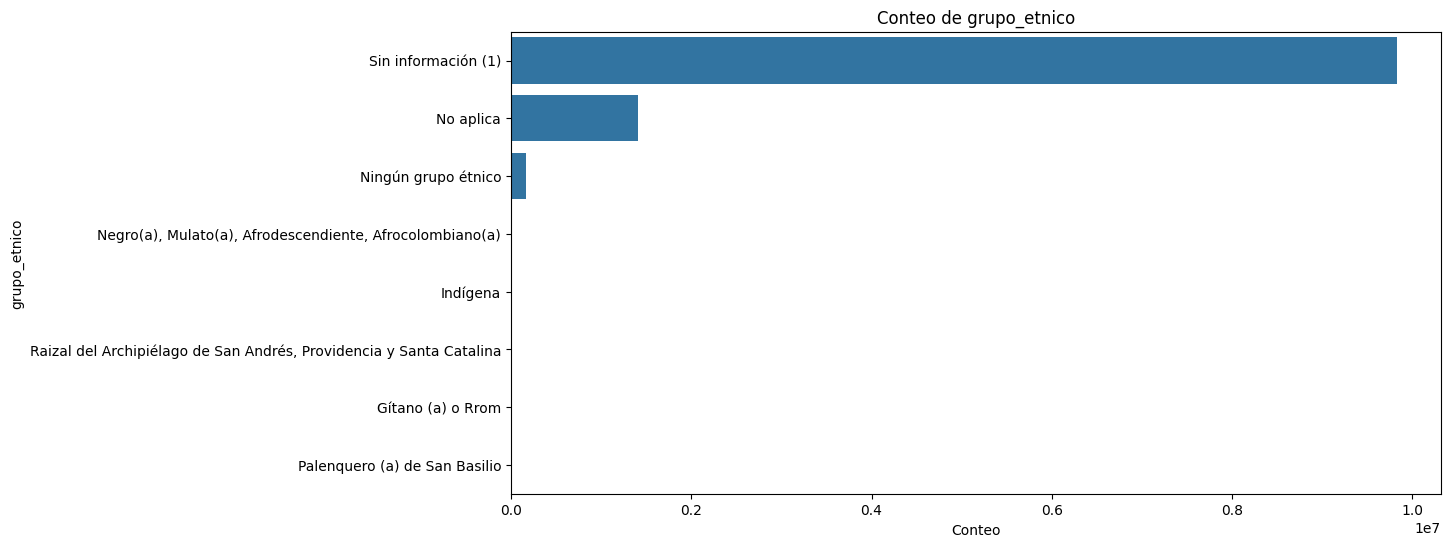

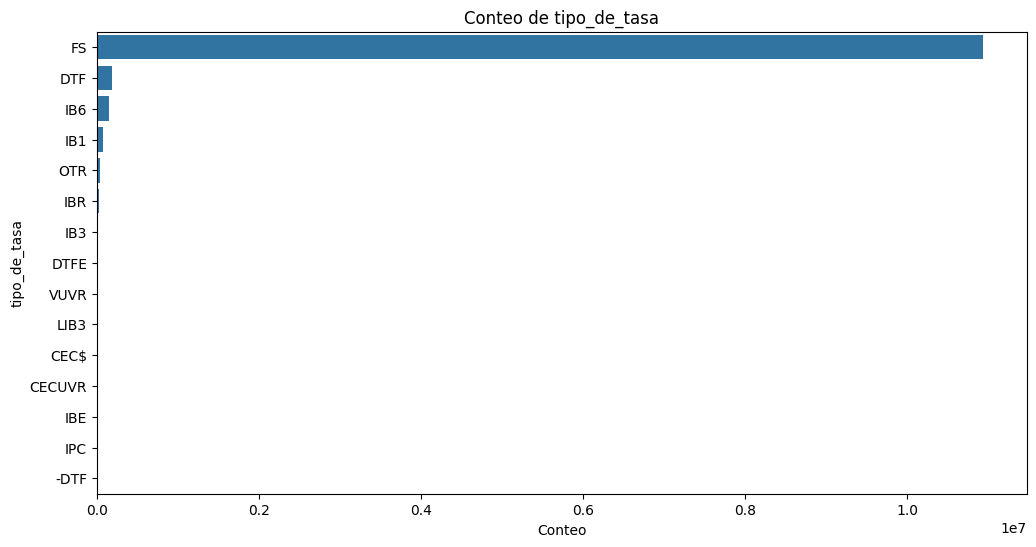

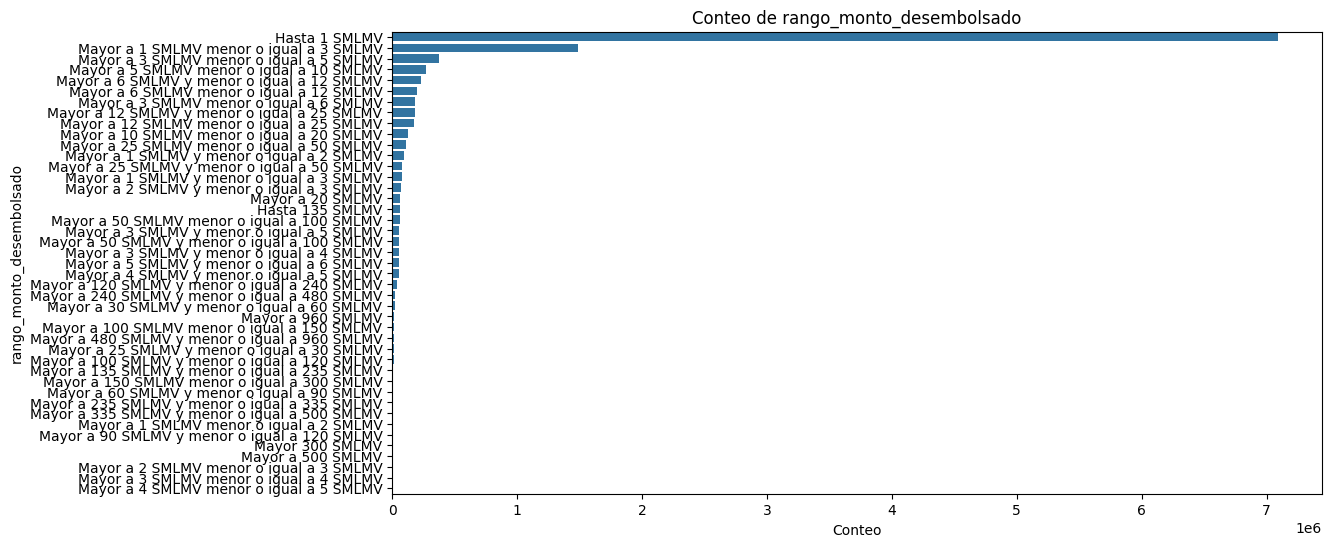

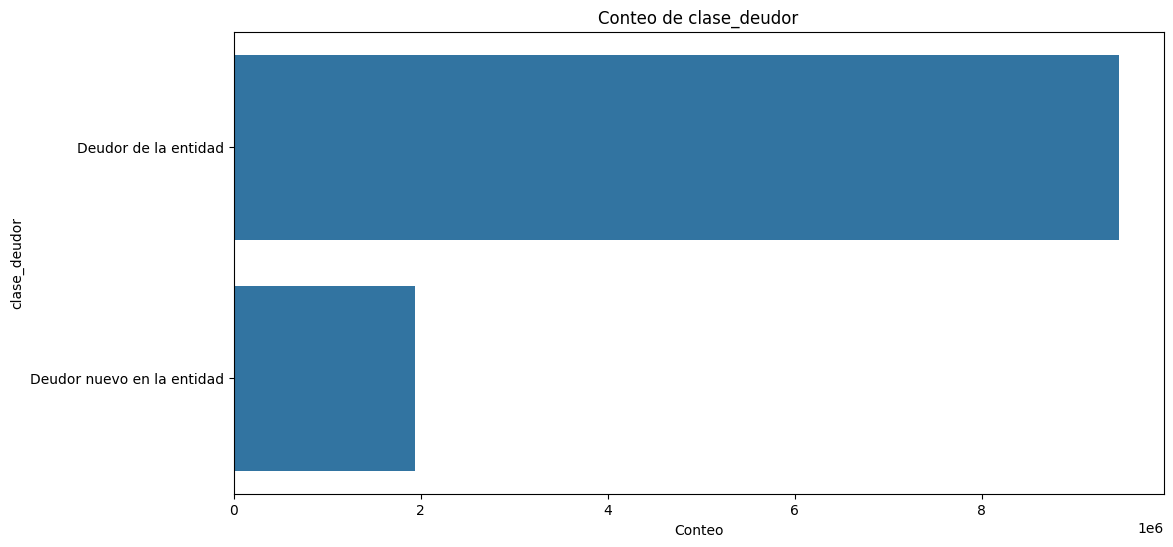

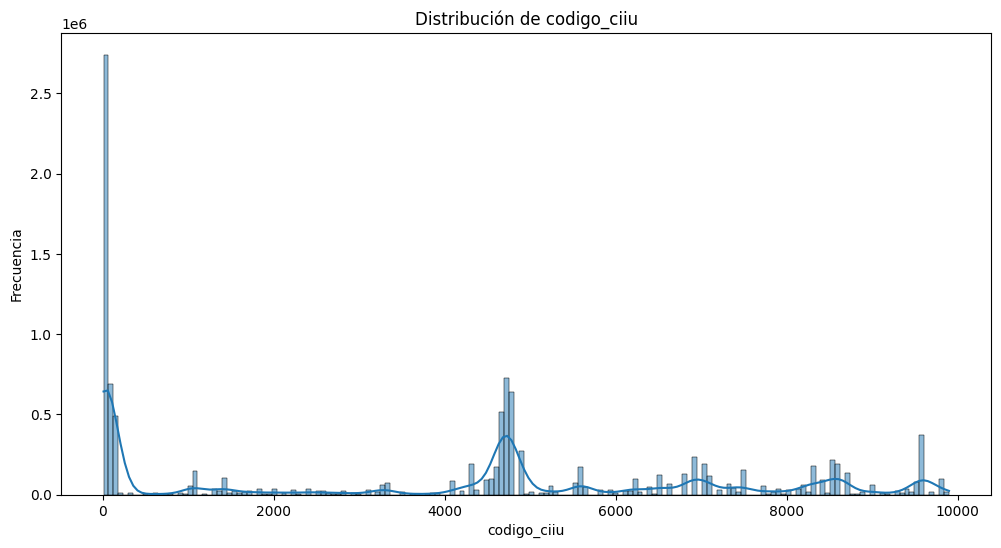

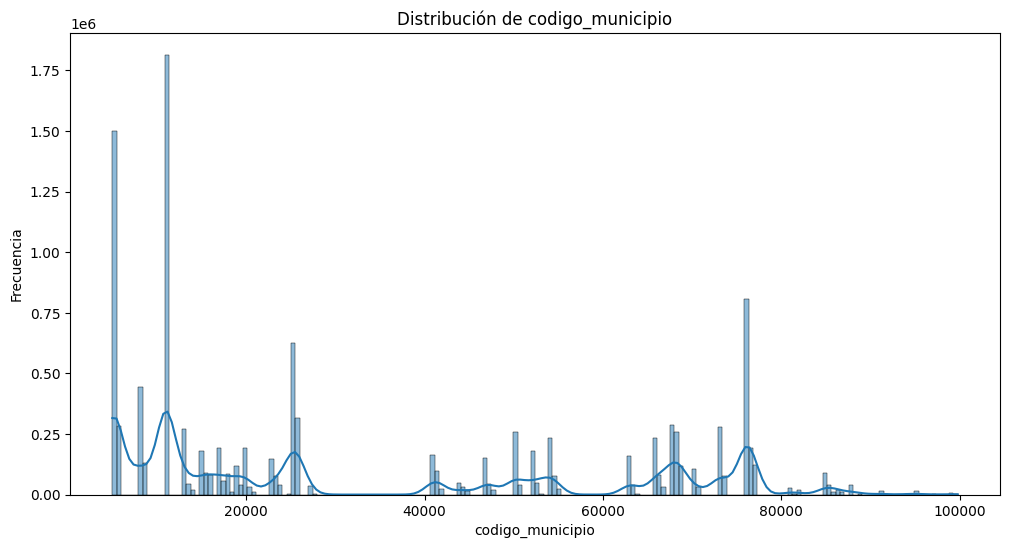

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV en un DataFrame
df = pd.read_csv('TasasCredito_V02.csv', low_memory=False)

# Lista de columnas a analizar
columns_to_analyze = [
    'grupo_etnico',
    'tipo_de_tasa',
    'rango_monto_desembolsado',
    'clase_deudor',
    'codigo_ciiu',
    'codigo_municipio'
]

# Crear un gráfico de distribución para cada columna
def plot_distribution(df, columns):
    for column in columns:
        if column in df.columns:
            # Crear un subplot para cada columna
            plt.figure(figsize=(12, 6))

            # Histograma para datos numéricos
            if df[column].dtype in ['int64', 'float64']:
                sns.histplot(df[column].dropna(), kde=True)
                plt.title(f'Distribución de {column}')
                plt.xlabel(column)
                plt.ylabel('Frecuencia')

            # Gráfico de barras para datos categóricos
            else:
                sns.countplot(y=df[column], order=df[column].value_counts().index)
                plt.title(f'Conteo de {column}')
                plt.xlabel('Conteo')
                plt.ylabel(column)

            plt.show()

# Llamar a la función de distribución para las columnas especificadas
plot_distribution(df, columns_to_analyze)

Se eliminaron 251,287 filas que contenían valores nulos en las columnas antiguedad_de_la_empresa, tipo_de_tasa, rango_monto_desembolsado, clase_deudor, codigo_ciiu y codigo_municipio, dado que las mismas filas presentaban datos faltantes en todas estas columnas. No fue posible imputar o asumir los valores faltantes de manera confiable, por lo que la mejor solución fue su eliminación. Estas filas representaban solo el 2.15% del total de registros, por lo que la integridad y representatividad del conjunto de datos no se vieron significativamente afectadas.

In [26]:
###### import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('TasasCredito_V02.csv')

# Especificar las columnas en las que deseas eliminar filas con valores nulos
columnas_con_nulos = [
    'antiguedad_de_la_empresa',
    'tipo_de_tasa',
    'rango_monto_desembolsado',
    'clase_deudor',
    'codigo_ciiu',
    'codigo_municipio'
]

# Eliminar filas que tienen valores nulos en las columnas especificadas
df_limpio = df.dropna(subset=columnas_con_nulos)

# Contar cuántas filas quedan después de la limpieza
filas_restantes = df_limpio.shape[0]
print(f"Número de filas restantes después de la limpieza: {filas_restantes}")

# Verificar si quedan valores nulos en otras columnas
valores_nulos_restantes = df_limpio.isnull().sum()

# Mostrar columnas con valores nulos restantes
columnas_con_nulos_restantes = valores_nulos_restantes[valores_nulos_restantes > 0]

if not columnas_con_nulos_restantes.empty:
    print("Columnas con valores nulos restantes después de la limpieza:")
    print(columnas_con_nulos_restantes)
else:
    print("No hay valores nulos restantes en ninguna columna.")

# Guardar el DataFrame limpio en un nuevo archivo CSV (opcional)
df_limpio.to_csv('TasasCredito_V03.csv', index=False)

# Mostrar las primeras filas del DataFrame limpio (opcional)
print(df_limpio.head())

Número de filas restantes después de la limpieza: 11411802
No hay valores nulos restantes en ninguna columna.
   tipo_entidad          nombre_tipo_entidad  codigo_entidad  \
0             1  BC-ESTABLECIMIENTO BANCARIO             1.0   
1             1  BC-ESTABLECIMIENTO BANCARIO             1.0   
2             1  BC-ESTABLECIMIENTO BANCARIO             1.0   
3             1  BC-ESTABLECIMIENTO BANCARIO             7.0   
4             1  BC-ESTABLECIMIENTO BANCARIO            39.0   

     nombre_entidad fecha_corte tipo_de_persona       sexo tamano_de_empresa  \
0   Banco de Bogotá  03/05/2024         Natural   Femenino         No aplica   
1   Banco de Bogotá  03/05/2024         Natural  Masculino      Microempresa   
2   Banco de Bogotá  03/05/2024         Natural  Masculino         No aplica   
3       Bancolombia  03/05/2024         Natural  Masculino         No aplica   
4  Banco Davivienda  26/04/2024         Natural   Femenino         No aplica   

       tipo_de_credito  

Validar valores unicos

In [24]:
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('TasasCredito_V03.csv')

# Especificar las columnas de las que deseas mostrar los valores únicos
columnas_con_nulos = [
    'antiguedad_de_la_empresa',
    'tipo_de_tasa',
    'rango_monto_desembolsado',
    'clase_deudor',
    'codigo_ciiu',
    'codigo_municipio',
    'grupo_etnico',
    'tipo_de_persona',
    'sexo',
    'nombre_entidad',
    'producto_de_credito',
    'tamano_de_empresa',
    'tipo_entidad',
    'tipo_de_garantia',
    'plazo_de_credito'    
]

# Mostrar los valores únicos de las columnas especificadas
for columna in columnas_con_nulos:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en la columna '{columna}':")
    print(valores_unicos)
    print("\n")

Valores únicos en la columna 'antiguedad_de_la_empresa':
['No aplica(1)' 'más de 5 y hasta 10 años' 'más de 10 años' '0 a 5 años']


Valores únicos en la columna 'tipo_de_tasa':
['FS' 'DTF' 'OTR' 'IB6' 'DTFE' 'IBR' 'IB1' 'IB3' 'IPC' 'VUVR' 'IBE' 'CEC$'
 '-DTF' 'LIB3' 'CECUVR']


Valores únicos en la columna 'rango_monto_desembolsado':
['Hasta 1 SMLMV' 'Mayor a 3 SMLMV menor o igual a 5 SMLMV'
 'Mayor a 5 SMLMV menor o igual a 10 SMLMV'
 'Mayor a 1 SMLMV menor o igual a 3 SMLMV'
 'Mayor a 3 SMLMV menor o igual a 6 SMLMV'
 'Mayor a 12 SMLMV menor o igual a 25 SMLMV'
 'Mayor a 6 SMLMV menor o igual a 12 SMLMV' 'Mayor a 20 SMLMV'
 'Mayor a 1 SMLMV y menor o igual a 3 SMLMV'
 'Mayor a 3 SMLMV y menor o igual a 4 SMLMV'
 'Mayor a 1 SMLMV y menor o igual a 2 SMLMV'
 'Mayor a 12 SMLMV y menor o igual a 25 SMLMV'
 'Mayor a 6 SMLMV y menor o igual a 12 SMLMV'
 'Mayor a 5 SMLMV y menor o igual a 6 SMLMV'
 'Mayor a 240 SMLMV y menor o igual a 480 SMLMV'
 'Mayor a 25 SMLMV y menor o igual a 50 SMLM

Limpieza y estandarizacion de los valores de la columna 'grupo_etnico' mediante tres pasos:

- Reemplaza valores específicos por términos más descriptivos.
- Imputa los valores nulos con 'Ningún grupo étnico'.
- Guarda el DataFrame limpio en un nuevo archivo CSV.

In [27]:
import pandas as pd

def update_grupo_etnico(file_path, output_file_path):
    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(file_path, low_memory=False)

    # Reemplazar el valor 'No aplica' por 'Ningún grupo étnico' en la columna 'grupo_etnico'
    df['grupo_etnico'] = df['grupo_etnico'].replace('No aplica', 'Ningún grupo étnico')

    # Reemplazar el valor 'Sin información (1)' por 'Sin información' en la columna 'grupo_etnico'
    df['grupo_etnico'] = df['grupo_etnico'].replace('Sin información (1)', 'Sin información')

    # Reemplazar los valores nulos en la columna 'grupo_etnico' por 'Ningún grupo étnico'
    df['grupo_etnico'] = df['grupo_etnico'].fillna('Ningún grupo étnico')

    # Guardar el DataFrame actualizado en un nuevo archivo CSV
    df.to_csv(output_file_path, index=False)

    # Verificar si aún quedan valores nulos en la columna 'grupo_etnico'
    null_count = df['grupo_etnico'].isnull().sum()

    if null_count == 0:
        print("No quedan valores nulos en la columna 'grupo_etnico'.")
    else:
        print(f"Aún quedan {null_count} valores nulos en la columna 'grupo_etnico'.")

    # Mostrar los primeros registros para verificar el cambio
    print(df[['grupo_etnico']].head())

# Definir el archivo CSV de entrada y salida
file_path = 'TasasCredito_V03.csv'
output_file_path = 'TasasCredito_V04.csv'

# Ejecutar la función para actualizar el valor en la columna 'grupo_etnico'
update_grupo_etnico(file_path, output_file_path)


No quedan valores nulos en la columna 'grupo_etnico'.
      grupo_etnico
0  Sin información
1  Sin información
2  Sin información
3  Sin información
4  Sin información


Limpieza y corrección de los valores de la columna 'tipo_de_tasa' en un archivo CSV mediante los siguientes pasos:

- Reemplazar el valor '-DTF' por 'DTF' para corregir inconsistencias en el formato.
- Verificar y notifica si aún quedan valores nulos en esa columna.
- Guardar los datos limpios en un nuevo archivo CSV ('TasasCredito_V04.csv').

In [28]:
import pandas as pd

def update_tipo_de_tasa(file_path, output_file_path):
    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(file_path, low_memory=False)

    # Reemplazar el valor '-DTF' por 'DTF' en la columna 'tipo_de_tasa'
    df['tipo_de_tasa'] = df['tipo_de_tasa'].replace('-DTF', 'DTF')

    # Guardar el DataFrame actualizado en un nuevo archivo CSV
    df.to_csv(output_file_path, index=False)

    # Verificar si aún quedan valores nulos en la columna 'tipo_de_tasa'
    null_count = df['tipo_de_tasa'].isnull().sum()

    if null_count == 0:
        print("No quedan valores nulos en la columna 'tipo_de_tasa'.")
    else:
        print(f"Aún quedan {null_count} valores nulos en la columna 'tipo_de_tasa'.")

    # Mostrar los primeros registros para verificar el cambio
    print(df[['tipo_de_tasa']].head())

# Definir el archivo CSV de entrada y salida
file_path = 'TasasCredito_V04.csv'
output_file_path = 'TasasCredito_V05.csv'

# Ejecutar la función para actualizar el valor en la columna 'tipo_de_tasa'
update_tipo_de_tasa(file_path, output_file_path)


No quedan valores nulos en la columna 'tipo_de_tasa'.
  tipo_de_tasa
0           FS
1           FS
2           FS
3           FS
4           FS


Verifica si los valores en la columna 'rango_monto_desembolsado' son similares entre sí, pero están escritos de forma ligeramente diferente.
Utiliza coincidencias difusas (con fuzzywuzzy) para encontrar errores comunes, como diferencias menores en la escritura. Los pasos incluyen:

- Convertir valores a cadenas.
- Reemplazar valores nulos.
- Comparar cada valor único con los demás para encontrar similitudes.
- Imprimir las similitudes encontradas, lo que ayuda a detectar posibles inconsistencias o duplicados no evidentes.

In [29]:
!pip install fuzzywuzzy python-Levenshtein
import pandas as pd
from fuzzywuzzy import fuzz, process

def validate_rango_monto_desembolsado(file_path):
    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(file_path, low_memory=False)

    # Convertir todos los valores en la columna 'rango_monto_desembolsado' a cadenas de texto
    df['rango_monto_desembolsado'] = df['rango_monto_desembolsado'].astype(str)

    # Reemplazar los valores NaN con una cadena vacía
    df['rango_monto_desembolsado'] = df['rango_monto_desembolsado'].replace('nan', '')

    # Obtener los valores únicos del campo 'rango_monto_desembolsado'
    rangos_unicos = df['rango_monto_desembolsado'].unique()

    # Crear un diccionario para almacenar las similitudes
    similitudes = {}

    # Comparar cada rango con todos los demás rangos para verificar similitud
    for rango in rangos_unicos:
        similitudes[rango] = process.extract(rango, rangos_unicos, scorer=fuzz.ratio)

    # Mostrar los resultados
    for rango, similares in similitudes.items():
        print(f"Rango: {rango}")
        for similar in similares:
            if similar[0] != rango:  # Excluir el mismo rango de la comparación
                print(f" - Similar a: {similar[0]} con una similitud de {similar[1]}%")
        print("\n")

# Definir el archivo CSV de entrada
file_path = 'TasasCredito_V05.csv'

# Ejecutar la función para validar los nombres en el campo 'rango_monto_desembolsado'
validate_rango_monto_desembolsado(file_path)


[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Rango: Hasta 1 SMLMV
 - Similar a: Hasta 135 SMLMV con una similitud de 93%
 - Similar a: Mayor a 20 SMLMV con una similitud de 62%
 - Similar a: Mayor a 960 SMLMV con una similitud de 60%
 - Similar a: Mayor a 500 SMLMV con una similitud de 60%


Rango: Mayor a 3 SMLMV menor o igual a 5 SMLMV
 - Similar a: Mayor a 3 SMLMV y menor o igual a 5 SMLMV con una similitud de 98%
 - Similar a: Mayor a 3 SMLMV menor o igual a 6 SMLMV con una similitud de 97%
 - Similar a: Mayor a 3 SMLMV menor o igual a 4 SMLMV con una similitud de 97%
 - Similar a: Mayor a 4 SMLMV menor o igual a 5 SMLMV con una similitud de 97%


Rango: Mayor a 5 SMLMV menor o igual a 10 SMLMV
 - Similar a: Mayor a 50 SMLMV menor o igual a 100 SMLMV con una similitud de 98%
 - Similar a: Mayor a 25 SMLMV menor o igual a 50 SMLMV con una similitud de 96%
 - Similar a: Mayor a 6 SMLMV menor o igual a 12 SMLMV con una similitud de 95%
 - Similar a: Mayor a 50 SMLMV y menor o igual a 100 SMLMV con una similitud de 95%


Rango: M

Corrección de formato de los rangos expresados en términos de salarios mínimos legales vigentes (SMLMV)

In [30]:
import pandas as pd

def replace_rango_monto_desembolsado(file_path, output_file_path):
    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(file_path, low_memory=False)

    # Diccionario con las sustituciones necesarias
    replacements = {
        'Mayor a 3 SMLMV menor o igual a 5 SMLMV': 'Mayor a 3 SMLMV y menor o igual a 5 SMLMV',
        'Mayor a 1 SMLMV menor o igual a 3 SMLMV': 'Mayor a 1 SMLMV y menor o igual a 3 SMLMV',
        'Mayor a 12 SMLMV menor o igual a 25 SMLMV': 'Mayor a 12 SMLMV y menor o igual a 25 SMLMV',
        'Mayor a 6 SMLMV menor o igual a 12 SMLMV': 'Mayor a 6 SMLMV y menor o igual a 12 SMLMV',
        'Mayor a 3 SMLMV menor o igual a 4 SMLMV': 'Mayor a 3 SMLMV y menor o igual a 4 SMLMV',
        'Mayor a 1 SMLMV menor o igual a 2 SMLMV': 'Mayor a 1 SMLMV y menor o igual a 2 SMLMV',
        'Mayor a 25 SMLMV menor o igual a 50 SMLMV': 'Mayor a 25 SMLMV y menor o igual a 50 SMLMV',
        'Mayor a 50 SMLMV menor o igual a 100 SMLMV': 'Mayor a 50 SMLMV y menor o igual a 100 SMLMV',
        'Mayor a 2 SMLMV menor o igual a 3 SMLMV': 'Mayor a 2 SMLMV y menor o igual a 3 SMLMV',
        'Mayor a 4 SMLMV menor o igual a 5 SMLMV': 'Mayor a 4 SMLMV y menor o igual a 5 SMLMV',
        'Mayor a 50 SMLMV menor o igual a 100 SMLMV': 'Mayor a 50 SMLMV y menor o igual a 100 SMLMV',
        'Mayor a 1 SMLMV menor o igual a 2 SMLMV': 'Mayor a 1 SMLMV y menor o igual a 2 SMLMV',
        'Mayor a 2 SMLMV menor o igual a 3 SMLMV': 'Mayor a 2 SMLMV y menor o igual a 3 SMLMV',
        'Mayor a 3 SMLMV menor o igual a 4 SMLMV': 'Mayor a 3 SMLMV y menor o igual a 4 SMLMV',
        'Mayor a 4 SMLMV menor o igual a 5 SMLMV': 'Mayor a 4 SMLMV y menor o igual a 5 SMLMV'
    }

    # Reemplazar los valores en la columna 'rango_monto_desembolsado'
    df['rango_monto_desembolsado'] = df['rango_monto_desembolsado'].replace(replacements)

    # Guardar el DataFrame actualizado en un nuevo archivo CSV
    df.to_csv(output_file_path, index=False)

    # Verificar los primeros registros para confirmar los cambios
    print(df[['rango_monto_desembolsado']].head())

# Definir el archivo CSV de entrada y salida
file_path = 'TasasCredito_V05.csv'
output_file_path = 'TasasCredito_V06.csv'

# Ejecutar la función para reemplazar los valores en la columna 'rango_monto_desembolsado'
replace_rango_monto_desembolsado(file_path, output_file_path)


                    rango_monto_desembolsado
0                              Hasta 1 SMLMV
1  Mayor a 3 SMLMV y menor o igual a 5 SMLMV
2                              Hasta 1 SMLMV
3                              Hasta 1 SMLMV
4                              Hasta 1 SMLMV


Graficar las columnas que tienes mas filas vacias

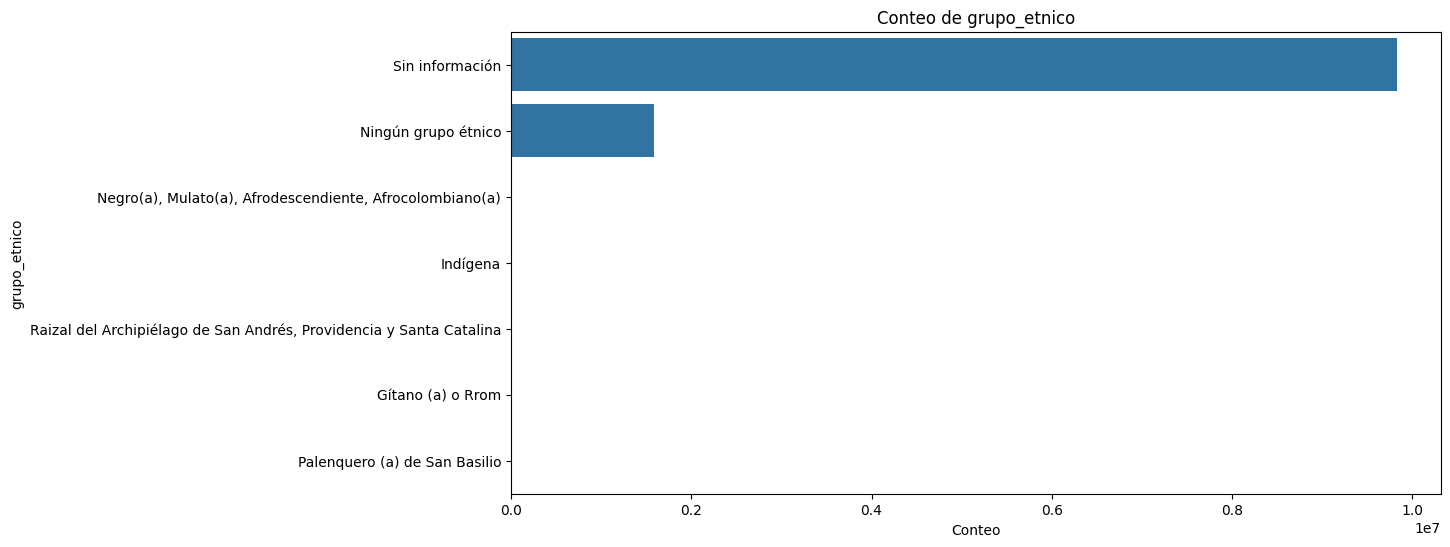

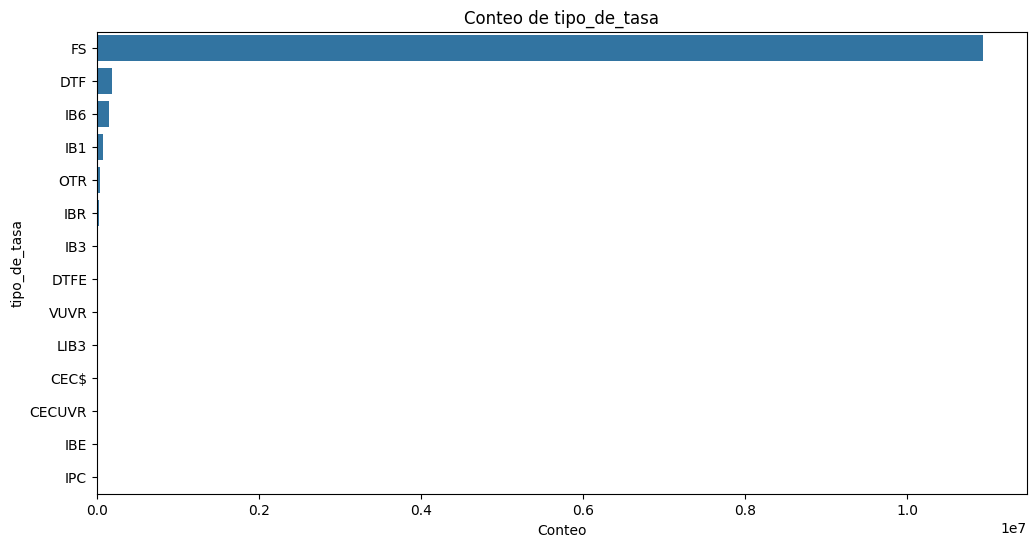

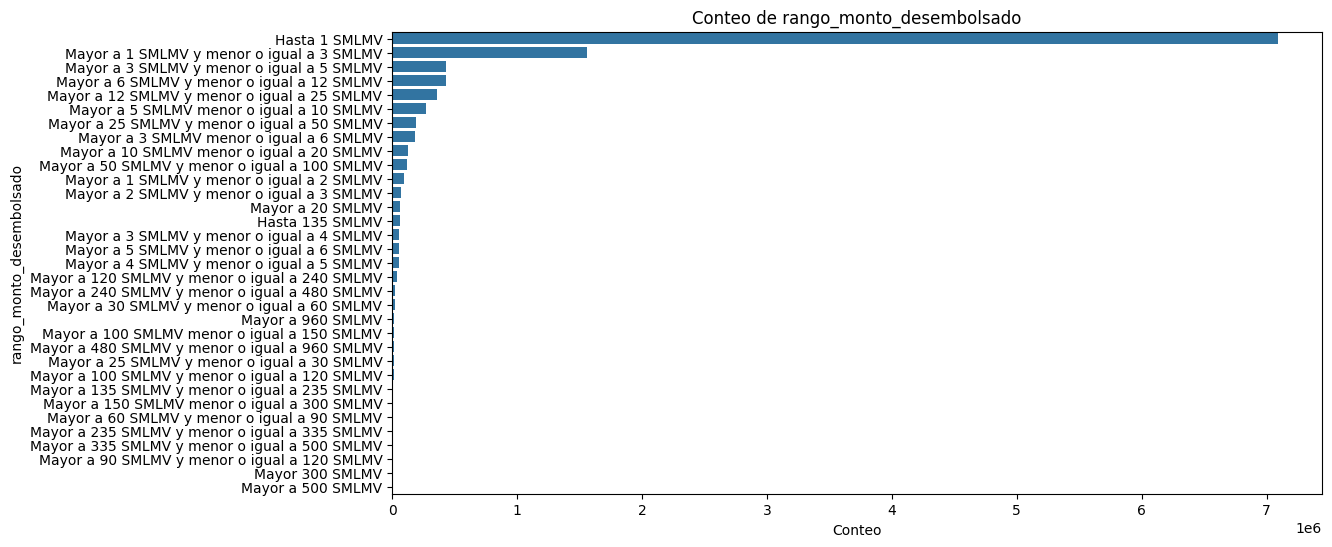

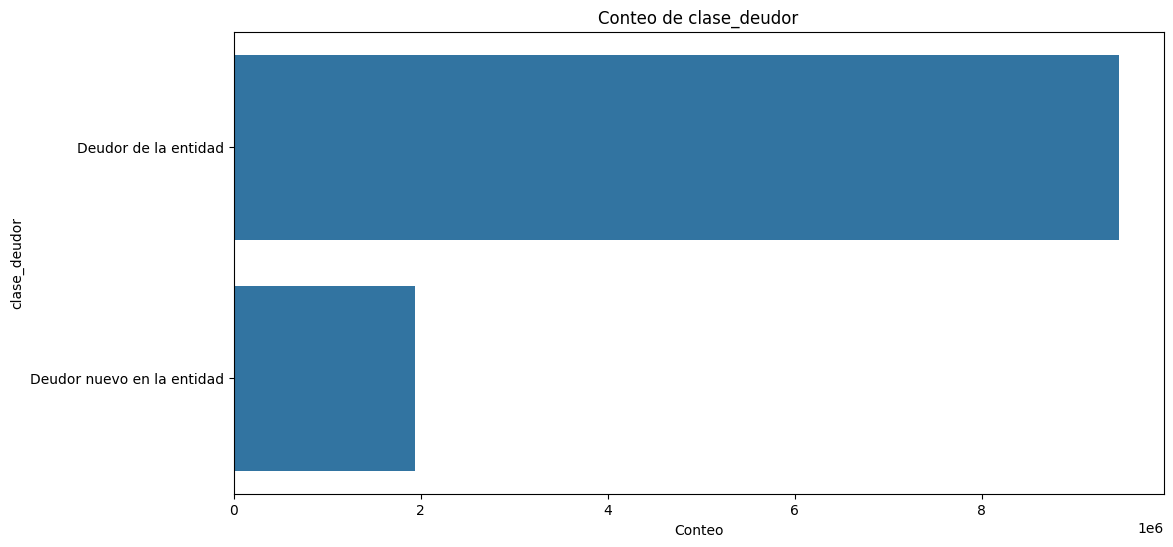

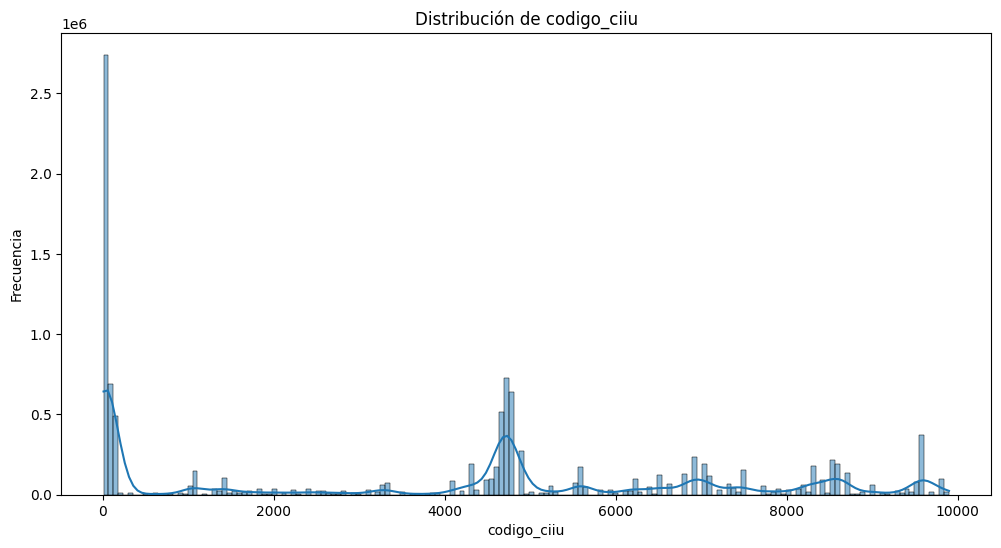

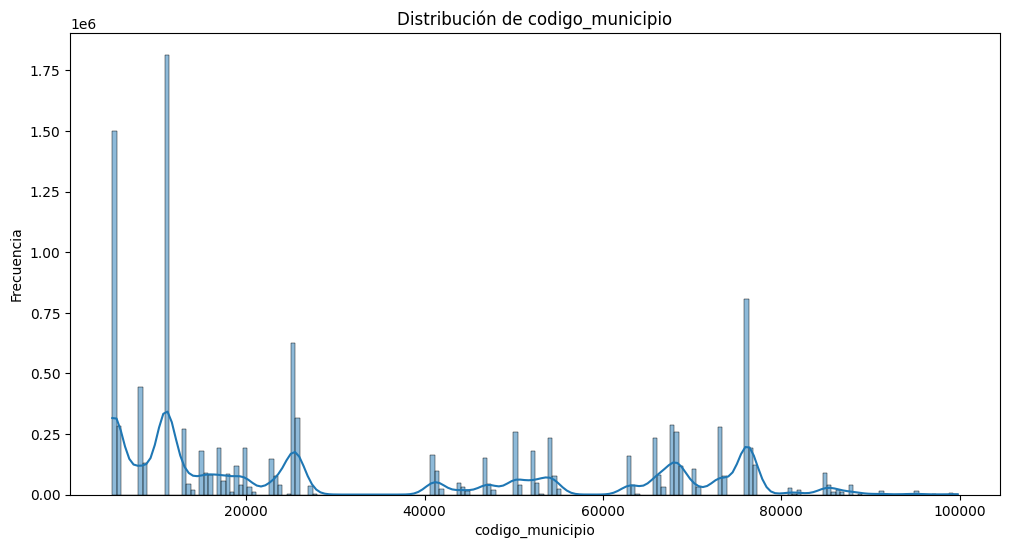

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV en un DataFrame
df = pd.read_csv('TasasCredito_V06.csv', low_memory=False)

# Lista de columnas a analizar
columns_to_analyze = [
    'grupo_etnico',
    'tipo_de_tasa',
    'rango_monto_desembolsado',
    'clase_deudor',
    'codigo_ciiu',
    'codigo_municipio'
]

# Crear un gráfico de distribución para cada columna
def plot_distribution(df, columns):
    for column in columns:
        if column in df.columns:
            # Crear un subplot para cada columna
            plt.figure(figsize=(12, 6))

            # Histograma para datos numéricos
            if df[column].dtype in ['int64', 'float64']:
                sns.histplot(df[column].dropna(), kde=True)
                plt.title(f'Distribución de {column}')
                plt.xlabel(column)
                plt.ylabel('Frecuencia')

            # Gráfico de barras para datos categóricos
            else:
                sns.countplot(y=df[column], order=df[column].value_counts().index)
                plt.title(f'Conteo de {column}')
                plt.xlabel('Conteo')
                plt.ylabel(column)

            plt.show()

# Llamar a la función de distribución para las columnas especificadas
plot_distribution(df, columns_to_analyze)

Normalización de los valores de texto y eliminacion de acentos reemplazando la letra "ñ" por "n".

In [33]:
import pandas as pd
import unidecode

def remove_accents_and_replace_ñ(df):
    # Función para eliminar tildes y reemplazar ñ por n
    def normalize_string(value):
        if isinstance(value, str):
            # Eliminar tildes y reemplazar ñ por n
            value = unidecode.unidecode(value)
        return value

    # Aplicar la función a cada columna del DataFrame usando map
    df = df.apply(lambda col: col.map(normalize_string))

    return df

# Leer el archivo CSV en un DataFrame
file_path = 'TasasCredito_V06.csv'
df = pd.read_csv(file_path)

# Aplicar la función para normalizar las columnas del DataFrame
df = remove_accents_and_replace_ñ(df)

# Guardar el DataFrame con los valores corregidos en un nuevo archivo CSV (opcional)
df.to_csv('TasasCredito_V07.csv', index=False)


Cambiar No aplica(1) por No aplica de la columna antiguedad_de_la_empresa

In [34]:
import pandas as pd

def replace_no_aplica(df):
    # Reemplazar "No aplica(1)" por "No aplica" en la columna antiguedad_de_la_empresa
    df['antiguedad_de_la_empresa'] = df['antiguedad_de_la_empresa'].replace("No aplica(1)", "No aplica")

    return df

# Leer el archivo CSV en un DataFrame
file_path = 'TasasCredito_V07.csv'
df = pd.read_csv(file_path)

# Aplicar la función para reemplazar los valores en la columna
df = replace_no_aplica(df)

# Guardar el DataFrame con los valores corregidos en un nuevo archivo CSV (opcional)
df.to_csv('TasasCredito_V08.csv', index=False)


Validar tipo de datos actuales

In [35]:
import pandas as pd

# Leer el archivo CSV
file_path = 'TasasCredito_V08.csv'
df = pd.read_csv(file_path, low_memory=False)

# Mostrar los tipos de datos actuales de cada columna
print("Tipos de datos actuales de cada columna:")
print(df.dtypes)

# Mostrar un resumen de las primeras filas para entender mejor los datos
print("\nPrimeros registros del DataFrame:")
print(df.head())

# Mostrar información adicional sobre el DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Contar valores nulos en cada columna
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Tipos de datos actuales de cada columna:
tipo_entidad                          int64
nombre_tipo_entidad                  object
codigo_entidad                      float64
nombre_entidad                       object
fecha_corte                          object
tipo_de_persona                      object
sexo                                 object
tamano_de_empresa                    object
tipo_de_credito                      object
tipo_de_garantia                     object
producto_de_credito                  object
plazo_de_credito                     object
tasa_efectiva_promedio_ponderada    float64
margen_adicional                    float64
montos_desembolsados                float64
numero_de_creditos_desembolsados    float64
grupo_etnico                         object
antiguedad_de_la_empresa             object
tipo_de_tasa                         object
rango_monto_desembolsado             object
clase_deudor                         object
codigo_ciiu                        

2. Transformación de Datos:

Generar las categorias unicas de cada uno de los campos

In [36]:
import pandas as pd

def mostrar_categorias_unicas(file_path):
    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(file_path, dtype=str)  # Lee todo como cadena para evitar problemas de tipo

    # Definir los campos para los cuales se mostrarán las categorías únicas
    campos = [
        'grupo_etnico', 'tipo_de_persona', 'sexo', 'nombre_tipo_entidad', 'nombre_entidad', 'producto_de_credito', 'rango_monto_desembolsado',
        'tipo_de_tasa','tamano_de_empresa', 'nombre_entidad', 'tipo_de_tasa','rango_monto_desembolsado', 'clase_deudor', 'antiguedad_de_la_empresa',
        'producto_de_credito','tipo_entidad','tipo_de_garantia','plazo_de_credito'
    ]

    # Mostrar las categorías únicas para cada campo
    for campo in campos:
        categorias_unicas = df[campo].unique()
        print(f"\nCategorías únicas en '{campo}':")
        for categoria in categorias_unicas:
            print(categoria)

# Ruta del archivo
file_path = 'TasasCredito_V08.csv'

# Ejecutar la función para mostrar las categorías únicas
mostrar_categorias_unicas(file_path)



Categorías únicas en 'grupo_etnico':
Sin informacion
Ningun grupo etnico
Gitano (a) o Rrom
Negro(a), Mulato(a), Afrodescendiente, Afrocolombiano(a)
Indigena
Raizal del Archipielago de San Andres, Providencia y Santa Catalina
Palenquero (a) de San Basilio

Categorías únicas en 'tipo_de_persona':
Natural
Juridica

Categorías únicas en 'sexo':
Femenino
Masculino
No aplica
No binario
Trans

Categorías únicas en 'nombre_tipo_entidad':
BC-ESTABLECIMIENTO BANCARIO
CF-COMPANIA DE FINANCIAMIENTO
COOPERATIVAS DE CARACTER FINANCIERO
INSTITUCION OFICIAL ESPECIAL
CF-CORPORACION FINANCIERA

Categorías únicas en 'nombre_entidad':
Banco de Bogota
Bancolombia
Banco Davivienda
Tuya
Itau
Banco Falabella S.A.
AV Villas
Coltefinanciera
Bancien
Banco Serfinanza S.A.
BBVA Colombia
Finandina
Bancoomeva
Banco Caja Social S.A.
Scotiabank Colpatria S.A.
Banco Popular
JFK Cooperativa Financiera
Banagrario
Coopcentral
Confiar
Banco W S.A.
Financiera Juriscoop C.F.
Banco de Occidente
Banco Mundo Mujer S.A.
Coopera

Agrupacion del nombre_tipo_entidad por tipo de entidad




In [37]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('TasasCredito_V08.csv')

# Función para obtener valores únicos de 'tipo_entidad' asociados a cada 'nombre_entidad'
def get_unique_tipo_entidad(df):
    # Agrupar por 'nombre_entidad' y luego aplicar la función unique() a 'tipo_entidad'
    unique_tipo_entidad = df.groupby('nombre_tipo_entidad')['tipo_entidad'].unique().reset_index()

    # Convertir el resultado en un DataFrame
    unique_tipo_entidad_df = pd.DataFrame(unique_tipo_entidad)

    # Mostrar el resultado
    return unique_tipo_entidad_df

# Ejecutar la función y mostrar los resultados
resultado = get_unique_tipo_entidad(df)
print(resultado)


                   nombre_tipo_entidad tipo_entidad
0          BC-ESTABLECIMIENTO BANCARIO          [1]
1        CF-COMPANIA DE FINANCIAMIENTO          [4]
2            CF-CORPORACION FINANCIERA          [2]
3  COOPERATIVAS DE CARACTER FINANCIERO         [32]
4         INSTITUCION OFICIAL ESPECIAL         [22]


Cambiar los valores de tipo de entidad 5 por 32 y 3 por 32, esto con el fin de manteneer un orden sin hacer saltos grandes

In [2]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('TasasCredito_V08.csv')

# Reemplazar los valores en la columna 'tipo_entidad'
df['tipo_entidad'] = df['tipo_entidad'].replace({32: 3, 22: 5})

# Imprimir los nuevos valores únicos de 'nombre_tipo_entidad' asociados con 'tipo_entidad'
resultados_unicos = df.groupby('nombre_tipo_entidad')['tipo_entidad'].unique()

print("Resultados únicos de 'nombre_tipo_entidad' asociados con 'tipo_entidad':")
print(resultados_unicos)

# Guardar el DataFrame actualizado en un nuevo archivo CSV
df.to_csv('TasasCredito_V09.csv', index=False)

print("Los valores en 'tipo_entidad' han sido actualizados y el archivo guardado como 'TasasCredito_V09.csv'.")


Resultados únicos de 'nombre_tipo_entidad' asociados con 'tipo_entidad':
nombre_tipo_entidad
BC-ESTABLECIMIENTO BANCARIO            [1]
CF-COMPANIA DE FINANCIAMIENTO          [4]
CF-CORPORACION FINANCIERA              [2]
COOPERATIVAS DE CARACTER FINANCIERO    [3]
INSTITUCION OFICIAL ESPECIAL           [5]
Name: tipo_entidad, dtype: object
Los valores en 'tipo_entidad' han sido actualizados y el archivo guardado como 'TasasCredito_V09.csv'.


Validar el valor unico del nombre de entidad por codigo de entidad

In [3]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('TasasCredito_V09.csv')

# Función para obtener valores únicos de 'tipo_entidad' asociados a cada 'nombre_entidad'
def get_unique_tipo_entidad(df):
    # Agrupar por 'nombre_entidad' y luego aplicar la función unique() a 'tipo_entidad'
    unique_tipo_entidad = df.groupby('codigo_entidad')['nombre_entidad'].unique().reset_index()

    # Convertir el resultado en un DataFrame
    unique_tipo_entidad_df = pd.DataFrame(unique_tipo_entidad)

    # Mostrar el resultado
    return unique_tipo_entidad_df

# Ejecutar la función y mostrar los resultados
resultado = get_unique_tipo_entidad(df)
print(resultado)


    codigo_entidad                                     nombre_entidad
0              1.0  [Banco de Bogota, Cooperativa Financiera de An...
1              2.0  [Banco Popular, JFK Cooperativa Financiera, Fi...
2              3.0  [Financiera De Desarrollo Nacional S.A., Coofi...
3              4.0                                 [Cotrafa, Finagro]
4              5.0                                          [Confiar]
5              6.0                                             [Itau]
6              7.0                                      [Bancolombia]
7              8.0                        [Fondo Nacional del Ahorro]
8              9.0                                         [Citibank]
9             11.0            [Caja de Vivienda Militar y de Policia]
10            12.0                              [Banco GNB Sudameris]
11            13.0                                    [BBVA Colombia]
12            23.0                               [Banco de Occidente]
13            26.0  

Como nombre de tipo de entidad y nombre de entidad tienen sus id unicos se decide eliminar estos dos campos

In [4]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('TasasCredito_V09.csv')

# Eliminar las columnas 'nombre_tipo_entidad' y 'nombre_entidad'
df = df.drop(columns=['nombre_tipo_entidad', 'nombre_entidad'])

# Guardar el nuevo DataFrame en un archivo CSV
df.to_csv('TasasCredito_V10.csv', index=False)

print("Las columnas 'nombre_tipo_entidad' y 'nombre_entidad' han sido eliminadas, y el archivo actualizado ha sido guardado como 'TasasCredito_V09.csv'.")


Las columnas 'nombre_tipo_entidad' y 'nombre_entidad' han sido eliminadas, y el archivo actualizado ha sido guardado como 'TasasCredito_V09.csv'.


Eliminacion de acentos
Sustitucion de ñ por n
Conversion de columnas categóricas en valores numéricos

In [5]:
import pandas as pd
import re

def remove_accents_and_replace_ñ(text):
    # Reemplaza acentos y ñ por n
    text = re.sub(r'[áàäâã]', 'a', text)
    text = re.sub(r'[éèëê]', 'e', text)
    text = re.sub(r'[íìïî]', 'i', text)
    text = re.sub(r'[óòöôõ]', 'o', text)
    text = re.sub(r'[úùüû]', 'u', text)
    text = re.sub(r'[ñ]', 'n', text)
    return text

def preprocess_and_encode(file_path, output_path):
    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(file_path, dtype=str)  # Lee todo como cadena para evitar problemas de tipo

    # Aplicar la función para eliminar acentos y reemplazar ñ a cada columna de tipo object
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].map(lambda x: remove_accents_and_replace_ñ(x) if isinstance(x, str) else x)

    # Definir los mapeos para la codificación ordinal
    tipo_de_credito_map = {
        'Comercial especial': 1,
        'Comercial ordinario': 2,
        'Comercial preferencial o corporativo': 3,
        'Comercial tesoreria': 4,
        'Consumo': 5,
        'Credito productivo': 6,
        'Vivienda': 7
    }

    tipo_de_garantia_map = {
        'Garantia idonea o no idonea': 1,
        'Garantia del fondo agropecuario de garantias (FAG)': 2,
        'Garantia  fondo nacional de garantias (FNG) o Fondo de Garantias de Antioquia (FGA)': 3,
        'Sin garantia': 4
    }

    plazo_de_credito_map = {
        'Hasta 30 dias': 1,
        'Hasta 6 meses': 2,
        'Consumos a un mes': 3,
        'Mas de 30 dias y hasta 1 ano': 4,
        'Entre 31 dias y 1 ano': 5,
        'Mas de 6 meses y hasta 1 ano': 6,
        'Consumos entre 2 y 6 meses': 7,
        'Consumos entre 7 y 12 meses': 8,
        'Consumos entre 13 y 18 meses': 9,
        'Consumos entre 19 y 24 meses': 10,
        'Mas de 1 ano y hasta 2 anos': 11,
        'Mas de 1 ano y hasta 3 anos': 12,
        'Mas de 2 anos y hasta 3 anos': 13,
        'Mas de 3 anos y hasta 5 anos': 14,
        'Vivienda hasta 5 anos': 15,
        'Mas de 5 anos y hasta 7 anos': 16,
        'Mas de 7 anos y hasta 10 anos': 17,
        'Mas de 7 anos y hasta 15 anos': 18,
        'Mas de 10 anos': 19,
        'Mas de 15 anos y hasta 20 anos': 20,
        'A mas de 20 anos': 21,
        'Consumos a mas de 36 meses': 22,
        'Consumos entre 25 y 36 meses': 23,
        'A mas de 7 anos': 24,
        'Avances en efectivo': 25
    }

    grupo_etnico_map = {
        'Sin informacion': 1,
        'Ningun grupo etnico': 2,
        'Gitano (a) o Rrom': 3,
        'Negro(a), Mulato(a), Afrodescendiente, Afrocolombiano(a)': 4,
        'Indigena': 5,
        'Raizal del Archipielago de San Andres, Providencia y Santa Catalina': 6,
        'Palenquero (a) de San Basilio': 7
    }

    tipo_de_persona_map = {
        'Natural': 1,
        'Juridica': 2
    }

    sexo_map = {
        'Femenino': 1,
        'Masculino': 2,
        'No aplica': 3,
        'No binario': 4,
        'Trans': 5
    }

    tipo_de_tasa_map = {
        'FS': 1,
        'DTF': 2,
        'OTR': 3,
        'IB6': 4,
        'DTFE': 5,
        'IBR': 6,
        'IB1': 7,
        'IB3': 8,
        'IPC': 9,
        'VUVR': 10,
        'IBE': 11,
        'CEC$': 12,
        'LIB3': 13,
        'CECUVR': 14,
    }

    tamano_de_empresa_map = {
        'No aplica': 1,
        'Microempresa': 2,
        'Pequena empresa': 3,
        'Mediana empresa': 4,
        'Gran empresa': 5
    }

    clase_deudor_map = {
        'Deudor nuevo en la entidad': 1,
        'Deudor de la entidad': 2
    }

    antiguedad_de_la_empresa_map = {
        'No aplica': 1,
        '0 a 5 anos': 2,
        'mas de 5 y hasta 10 anos': 3,
        'mas de 10 anos': 4
    }

    producto_de_credito_map = {
        'Tarjeta de credito para ingresos superiores a 2 SMMLV': 1,
        'Tarjeta de credito empresarial': 2,
        'Tarjeta de credito para ingresos hasta 2 SMMLV': 3,
        'Sobregiro en cuenta corriente persona natural': 4,
        'Libre inversion': 5,
        'Libranza otros': 6,
        'Credito rotativo': 7,
        'Sobregiro en cuenta corriente persona juridica o persona natural': 8,
        'Credito popular productivo urbano (sin recursos de redescuento)': 9,
        'Credito popular productivo rural (sin recursos de redescuento)': 10,
        'Consumo otros': 11,
        'Factoring': 12,
        'Consumo empleados': 13,
        'Empresarial en pesos': 14,
        'Corporativo':15,
        'Vehiculo': 16,
        'Creditos de consumo de bajo monto': 17,
        'Adquisicion de vivienda vis (colocacion en pesos)': 18,
        'Credito popular productivo urbano  (con recursos de redescuento)': 19,
        'Credito productivo rural  (con recursos de redescuento)': 20,
        'Empresarial - Tesoreria': 21,
        'Credito productivo urbano (sin recursos de redescuento)': 22,
        'Comerciales especiales establecidos mediante leyes': 23,
        'Credito productivo de mayor monto (sin recursos de redescuento)': 24,
        'Adquisicion de vivienda vis (colocacion en uvr)': 25,
        'Otros Comercial': 26,
        'Adquisicion de vivienda no vis (colocacion en pesos)': 27,
        'Leasing financiero - financiacion vehiculos': 28,
        'Comerciales con recursos provenientes de redescuento': 29,
        'Credito popular productivo rural (con recursos de redescuento)': 30,
        'Adquisicion leasing habitacional no vis (colocacion en pesos)': 31,
        'Adquisicion de vivienda no vis (colocacion en uvr)': 32,
        'Credito productivo urbano  (con recursos de redescuento)': 33,
        'Credito productivo rural (sin recursos de redescuento)': 34,
        'Financiero e institucional para colocaciones con recursos de redescuento': 35,
        'Oficial o Gobierno': 36,
        'Construccion de vivienda individual no vis (colocacion en pesos)': 37,
        'Leasing financiero - otros': 38,
        'Leasing financiero - financiacion maquinaria y equipo': 39,
        'Credito productivo de mayor monto (con recursos de redescuento)': 40,
        'Creditos educativos diferentes a libranza': 41,
        'Construccion de proyectos de vivienda no vis (colocacion en uvr)': 42,
        'Vivienda empleados': 43,
        'Construccion de proyectos de vivienda no vis (colocacion en pesos)': 44,
        'Empresarial en UVR': 45,
        'Construccion de proyectos de vivienda  vis (colocacion en uvr)': 46,
        'Construccion de proyectos de vivienda vis (colocacion en uvr)': 47,
        'Leasing financiero - financiacion inmuebles diferente de habitacional': 48,
        'Construccion de proyectos de vivienda vis (colocacion en pesos)': 49,
        'Libranza adquisicion de vivienda vis (colocacion en pesos)': 50,
        'Financiero e institucional': 51,
        'Construccion de vivienda individual vis (colocacion en pesos)': 52,
        'Adquisicion leasing habitacional vis (colocacion en pesos)': 53,
        'Construccion de vivienda individual vis (colocacion en uvr)': 54,
        'Adquisicion leasing habitacional no vis (colocacion en uvr)': 55,
        'Comerciales especiales directos por la banca de segundo piso': 56,
        'Construccion de vivienda individual no vis (colocacion en uvr)': 57,
        'Construccion - financiacion de proyectos viales en pesos': 58,
        'Otros Construccion (Colocacion en pesos)': 59,
        'Libranza adquisicion de vivienda diferente de vis (colocacion en pesos)': 60,
        'Adquisicion leasing habitacional vis (colocacion en uvr)': 61,
        'Construccion - financiacion de proyectos viales': 62
    }

    rango_monto_desembolsado_map = {
        'Hasta 1 SMLMV': 1,
        'Mayor a 3 SMLMV y menor o igual a 5 SMLMV': 2,
        'Mayor a 5 SMLMV menor o igual a 10 SMLMV': 3,
        'Mayor a 1 SMLMV y menor o igual a 3 SMLMV': 4,
        'Mayor a 3 SMLMV menor o igual a 6 SMLMV': 5,
        'Mayor a 12 SMLMV y menor o igual a 25 SMLMV': 6,
        'Mayor a 6 SMLMV y menor o igual a 12 SMLMV': 7,
        'Mayor a 20 SMLMV': 8,
        'Mayor a 3 SMLMV y menor o igual a 4 SMLMV': 9,
        'Mayor a 1 SMLMV y menor o igual a 2 SMLMV': 10,
        'Mayor a 5 SMLMV y menor o igual a 6 SMLMV': 11,
        'Mayor a 240 SMLMV y menor o igual a 480 SMLMV': 12,
        'Mayor a 25 SMLMV y menor o igual a 50 SMLMV': 13,
        'Mayor a 10 SMLMV menor o igual a 20 SMLMV': 14,
        'Mayor a 50 SMLMV y menor o igual a 100 SMLMV': 15,
        'Mayor a 2 SMLMV y menor o igual a 3 SMLMV': 16,
        'Hasta 135 SMLMV': 17,
        'Mayor a 4 SMLMV y menor o igual a 5 SMLMV': 18,
        'Mayor a 25 SMLMV y menor o igual a 30 SMLMV': 19,
        'Mayor a 960 SMLMV': 20,
        'Mayor a 480 SMLMV y menor o igual a 960 SMLMV': 21,
        'Mayor a 100 SMLMV menor o igual a 150 SMLMV': 22,
        'Mayor a 135 SMLMV y menor o igual a 235 SMLMV': 23,
        'Mayor a 120 SMLMV y menor o igual a 240 SMLMV': 24,
        'Mayor a 100 SMLMV y menor o igual a 120 SMLMV': 25,
        'Mayor a 150 SMLMV menor o igual a 300 SMLMV': 26,
        'Mayor a 335 SMLMV y menor o igual a 500 SMLMV': 27,
        'Mayor a 30 SMLMV y menor o igual a 60 SMLMV': 28,
        'Mayor 300 SMLMV': 29,
        'Mayor a 60 SMLMV y menor o igual a 90 SMLMV': 30,
        'Mayor a 90 SMLMV y menor o igual a 120 SMLMV': 31,
        'Mayor a 500 SMLMV': 32,
        'Mayor a 235 SMLMV y menor o igual a 335 SMLMV': 33
        # Agrega más categorías según sea necesario
    }

    # Aplicar la codificación ordinal
    df['tipo_de_credito'] = df['tipo_de_credito'].map(tipo_de_credito_map)
    df['tipo_de_garantia'] = df['tipo_de_garantia'].map(tipo_de_garantia_map)
    df['plazo_de_credito'] = df['plazo_de_credito'].map(plazo_de_credito_map)
    df['grupo_etnico'] = df['grupo_etnico'].map(grupo_etnico_map)
    df['tipo_de_persona'] = df['tipo_de_persona'].map(tipo_de_persona_map)
    df['sexo'] = df['sexo'].map(sexo_map)
    df['tamano_de_empresa'] = df['tamano_de_empresa'].map(tamano_de_empresa_map)
    df['clase_deudor'] = df['clase_deudor'].map(clase_deudor_map)
    df['antiguedad_de_la_empresa'] = df['antiguedad_de_la_empresa'].map(antiguedad_de_la_empresa_map)
    df['producto_de_credito'] = df['producto_de_credito'].map(producto_de_credito_map)
    df['rango_monto_desembolsado'] = df['rango_monto_desembolsado'].map(rango_monto_desembolsado_map)
    df['tipo_de_tasa'] = df['tipo_de_tasa'].map(tipo_de_tasa_map)

    # Contar los valores nulos después de la codificación
    null_counts = df.isnull().sum()

    # Mostrar el conteo de valores nulos por columna
    print("\nConteo de valores nulos después de la codificación:")
    print(null_counts)

    # Guardar el DataFrame con los cambios en un nuevo archivo CSV
    df.to_csv(output_path, index=False)

# Rutas de los archivos
input_file_path = 'TasasCredito_V10.csv'
output_file_path = 'TasasCredito_V11.csv'



# Ejecutar la función de procesamiento y codificación
preprocess_and_encode(input_file_path, output_file_path)


Conteo de valores nulos después de la codificación:
tipo_entidad                        0
codigo_entidad                      0
fecha_corte                         0
tipo_de_persona                     0
sexo                                0
tamano_de_empresa                   0
tipo_de_credito                     0
tipo_de_garantia                    0
producto_de_credito                 0
plazo_de_credito                    0
tasa_efectiva_promedio_ponderada    0
margen_adicional                    0
montos_desembolsados                0
numero_de_creditos_desembolsados    0
grupo_etnico                        0
antiguedad_de_la_empresa            0
tipo_de_tasa                        0
rango_monto_desembolsado            0
clase_deudor                        0
codigo_ciiu                         0
codigo_municipio                    0
dtype: int64


* Distribución de las columnas numéricas
* Distribución de las columnas categóricas
* Funciones de análisis

Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11411802 entries, 0 to 11411801
Data columns (total 21 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   tipo_entidad                      int64  
 1   codigo_entidad                    float64
 2   fecha_corte                       object 
 3   tipo_de_persona                   int64  
 4   sexo                              int64  
 5   tamano_de_empresa                 int64  
 6   tipo_de_credito                   int64  
 7   tipo_de_garantia                  int64  
 8   producto_de_credito               int64  
 9   plazo_de_credito                  int64  
 10  tasa_efectiva_promedio_ponderada  float64
 11  margen_adicional                  float64
 12  montos_desembolsados              float64
 13  numero_de_creditos_desembolsados  float64
 14  grupo_etnico                      int64  
 15  antiguedad_de_la_empresa          int64  
 16  tipo_de_tas

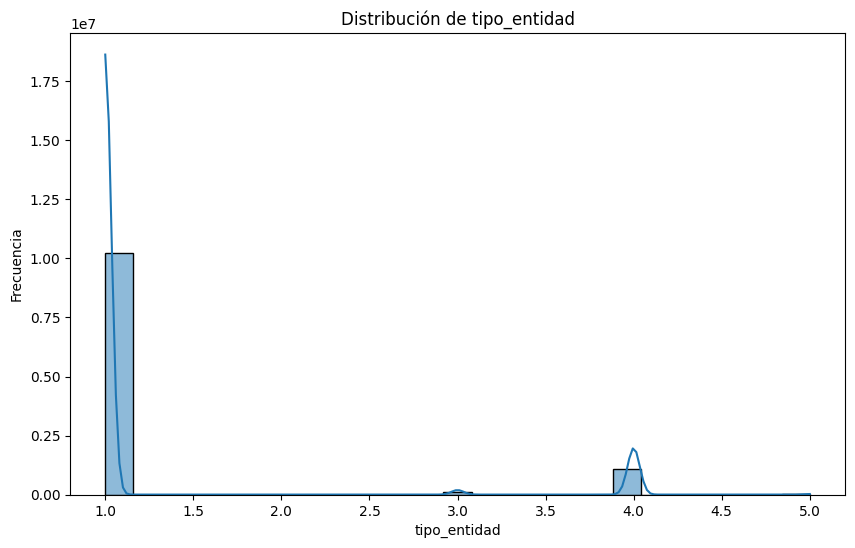

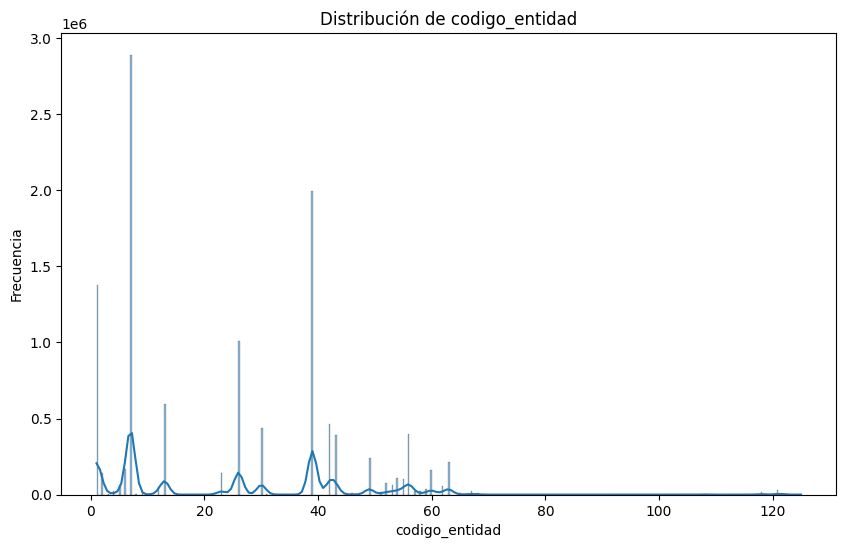

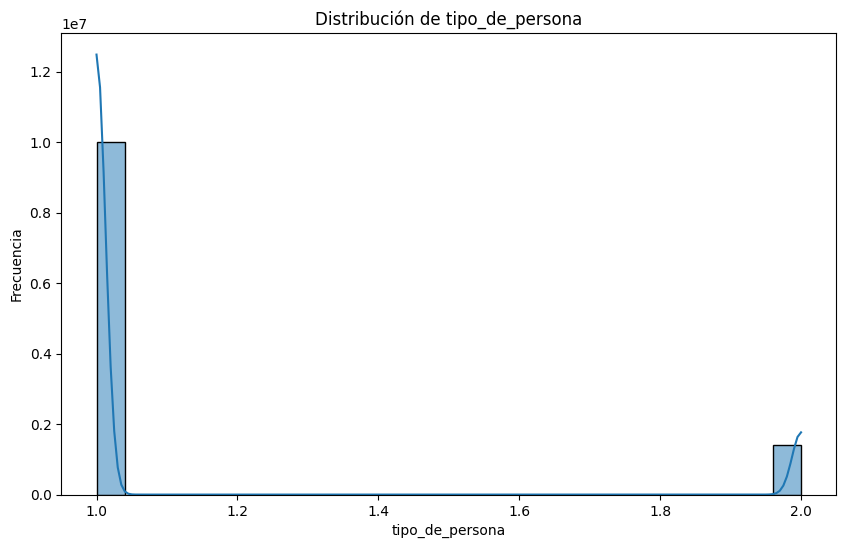

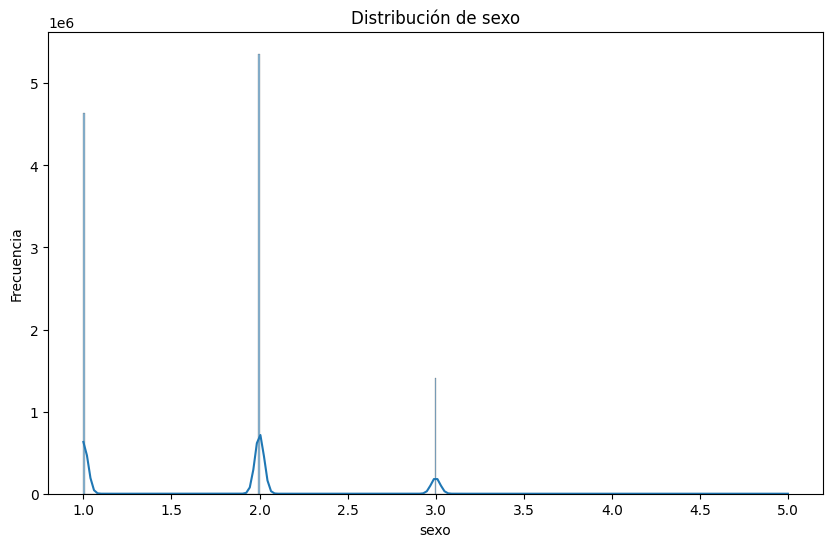

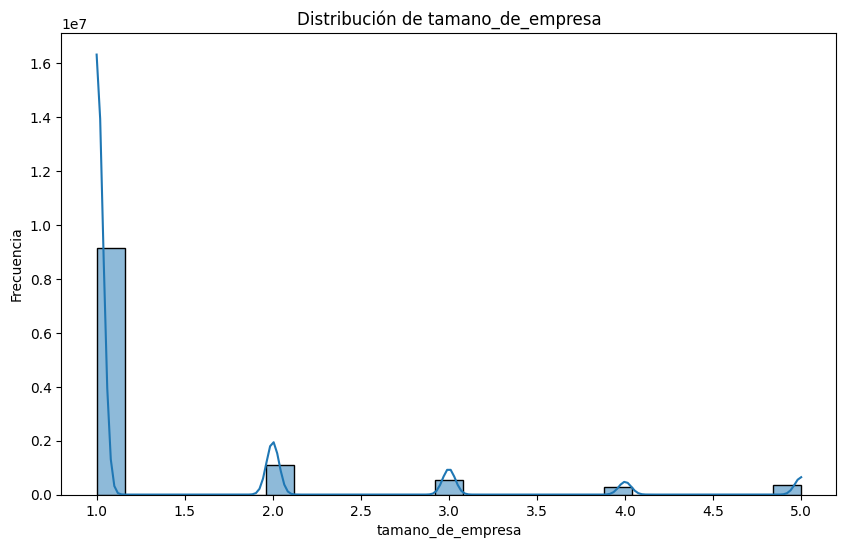

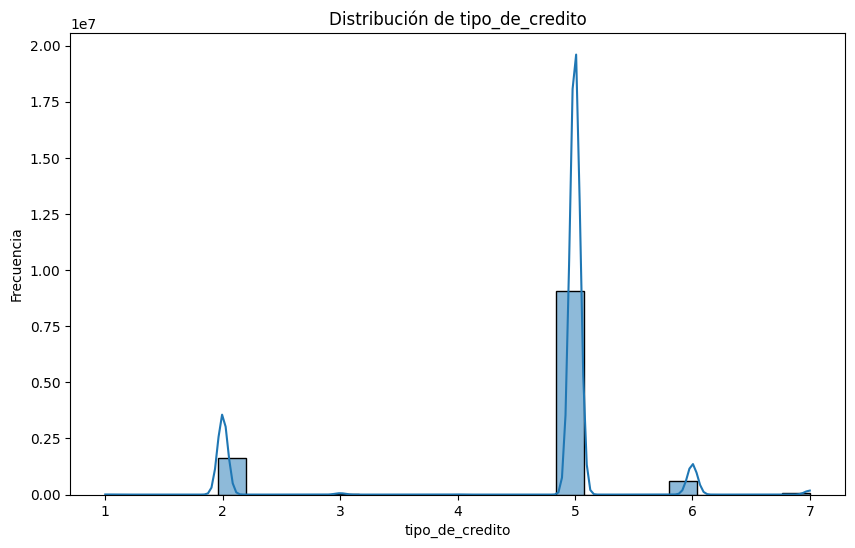

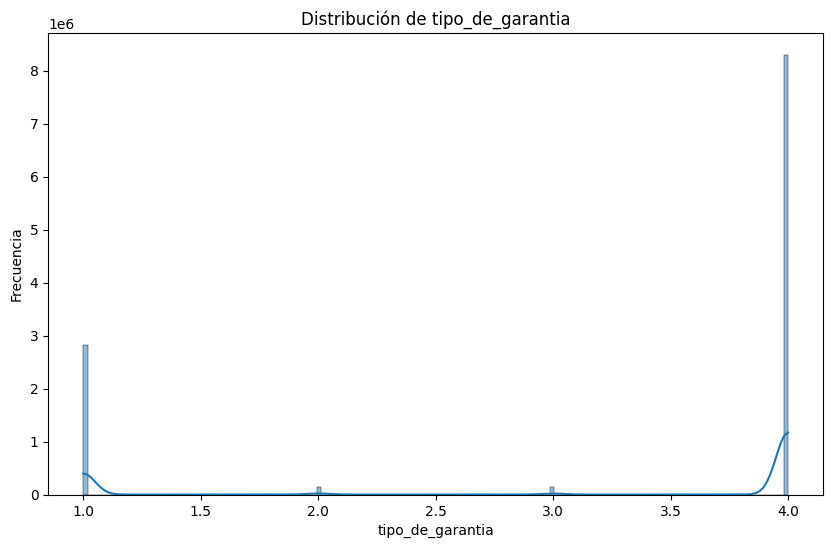

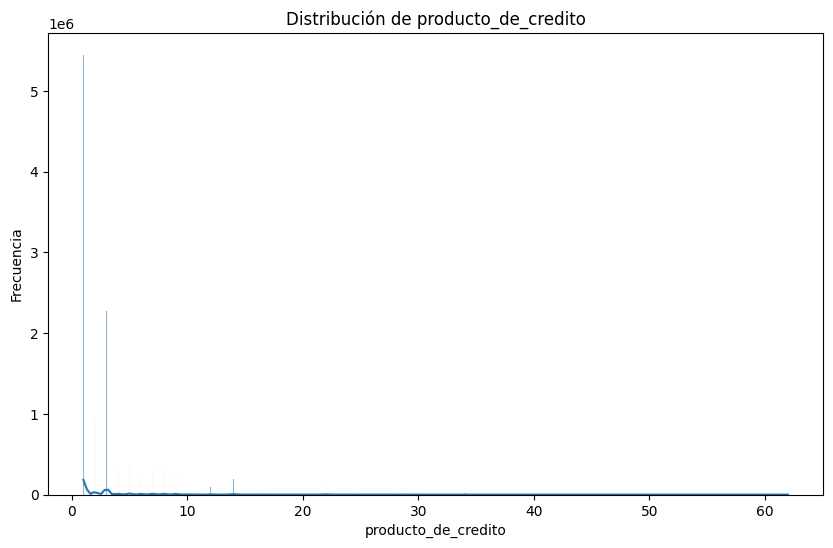

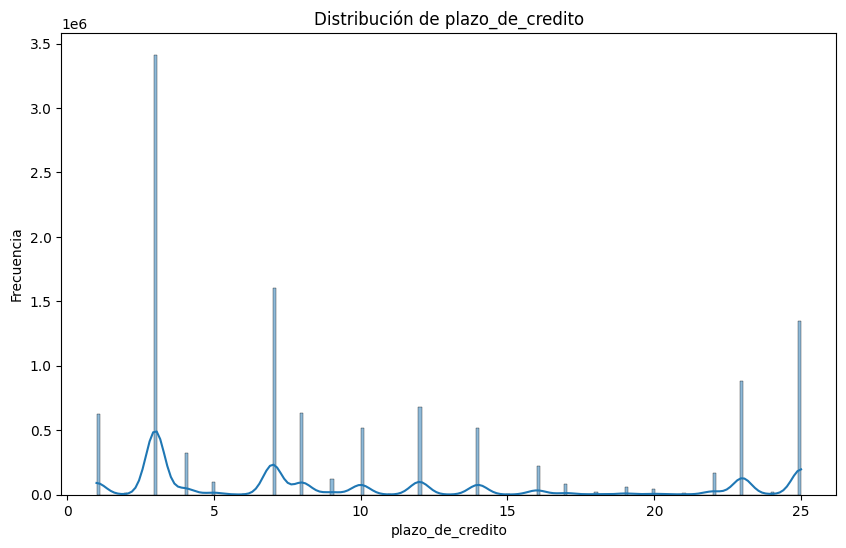

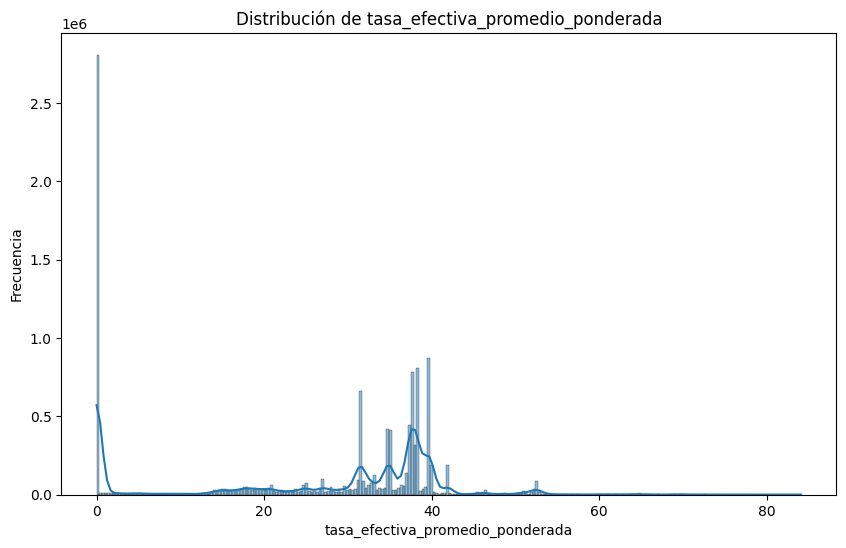

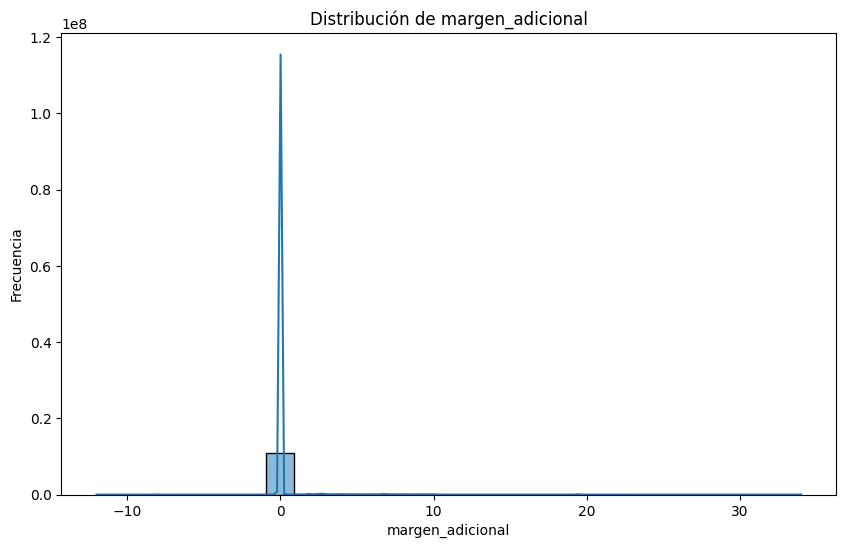

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('TasasCredito_V11.csv')

# Resumen general del DataFrame
print("Resumen del DataFrame:")
print(df.info())
print("\nDescripción de las columnas numéricas:")
print(df.describe())

# Analizar la distribución de las columnas numéricas
def analizar_distribucion_numericas(df):
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    for col in columnas_numericas:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

# Analizar la distribución de las columnas categóricas
def analizar_distribucion_categoricas(df):
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
    for col in columnas_categoricas:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.show()

# Ejecutar las funciones de análisis
analizar_distribucion_numericas(df)
analizar_distribucion_categoricas(df)


* Consultar los tipos de datos
* Validar si hay valores nulos

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('TasasCredito_V11.csv')

# Consultar los tipos de datos de cada columna
tipos_de_datos = df.dtypes

# Contar los valores nulos en cada columna
valores_nulos = df.isnull().sum()

# Mostrar los resultados
print("Tipos de datos de cada columna:")
print(tipos_de_datos)
print("\nCantidad de valores nulos en cada columna:")
print(valores_nulos)


* Validar el tipo de dato del campo fecha.
* Convertir el tipo de campo fecha a datetime
* Validar que el tipo de campo quede datatime
* Revisar que despues de la conversion no queden valores nulos

In [1]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('TasasCredito_V11.csv')

# Función para intentar convertir fechas sin generar nulos
def convertir_a_datetime(fecha):
    formatos = ['%d/%m/%Y', '%Y-%m-%d', '%Y/%m/%d']  # Agrega los formatos esperados aquí
    for formato in formatos:
        try:
            return pd.to_datetime(fecha, format=formato)
        except (ValueError, TypeError):
            continue
    return np.nan  # Si no se puede convertir, devuelve NaN temporalmente

# Aplicar la función de conversión
df['fecha_corte'] = df['fecha_corte'].apply(convertir_a_datetime)

# Verificar los tipos de datos
print("\nTipos de datos de todas las columnas después de la conversión:")
print(df.dtypes)

# Verificar la presencia de valores nulos
valores_nulos = df.isnull().sum()
print("\nConteo de valores nulos en cada columna:")
print(valores_nulos)

# Asegurarse de que 'fecha_corte' sea de tipo datetime y no contenga valores nulos
assert pd.api.types.is_datetime64_any_dtype(df['fecha_corte']), "Error: 'fecha_corte' no es de tipo datetime."
assert df['fecha_corte'].isnull().sum() == 0, "Error: Hay valores nulos en 'fecha_corte'."

# Guardar el DataFrame actualizado
df.to_csv('TasasCredito_V12.csv', index=False)


Tipos de datos de todas las columnas después de la conversión:
tipo_entidad                                 int64
codigo_entidad                             float64
fecha_corte                         datetime64[ns]
tipo_de_persona                              int64
sexo                                         int64
tamano_de_empresa                            int64
tipo_de_credito                              int64
tipo_de_garantia                             int64
producto_de_credito                          int64
plazo_de_credito                             int64
tasa_efectiva_promedio_ponderada           float64
margen_adicional                           float64
montos_desembolsados                       float64
numero_de_creditos_desembolsados           float64
grupo_etnico                                 int64
antiguedad_de_la_empresa                     int64
tipo_de_tasa                                 int64
rango_monto_desembolsado                     int64
clase_deudor      

Estructura del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11411802 entries, 0 to 11411801
Data columns (total 21 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   tipo_entidad                      int64  
 1   codigo_entidad                    float64
 2   fecha_corte                       object 
 3   tipo_de_persona                   int64  
 4   sexo                              int64  
 5   tamano_de_empresa                 int64  
 6   tipo_de_credito                   int64  
 7   tipo_de_garantia                  int64  
 8   producto_de_credito               int64  
 9   plazo_de_credito                  int64  
 10  tasa_efectiva_promedio_ponderada  float64
 11  margen_adicional                  float64
 12  montos_desembolsados              float64
 13  numero_de_creditos_desembolsados  float64
 14  grupo_etnico                      int64  
 15  antiguedad_de_la_empresa          int64  
 16  

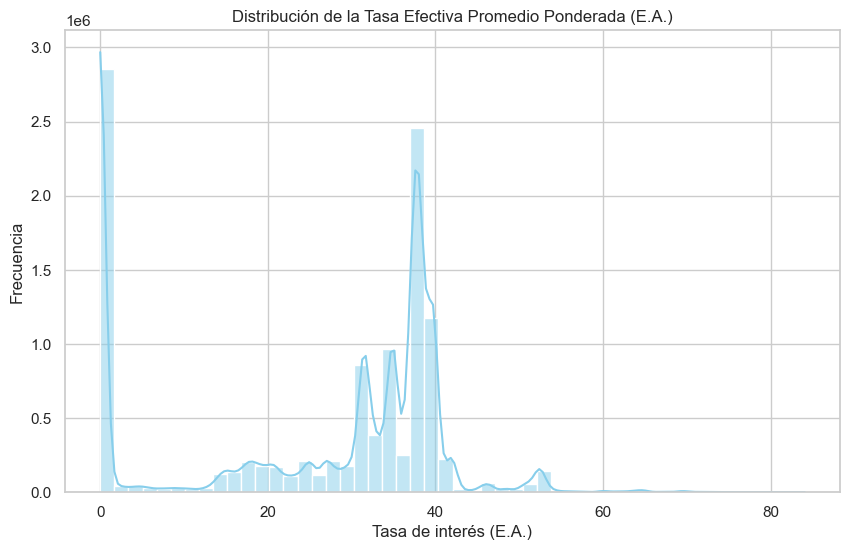

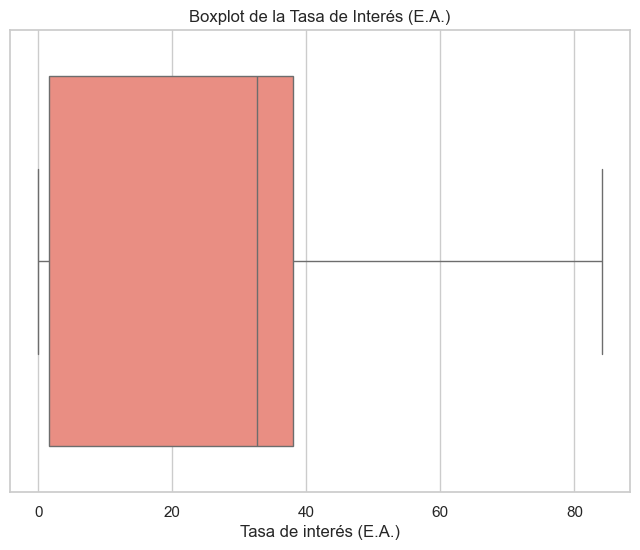


Percentiles de la tasa de interés (E.A.):
25th Percentile: 1.54
50th Percentile (Mediana): 32.61
75th Percentile: 37.99

Columnas numéricas para el análisis de correlación: ['tipo_entidad', 'codigo_entidad', 'tipo_de_persona', 'sexo', 'tamano_de_empresa', 'tipo_de_credito', 'tipo_de_garantia', 'producto_de_credito', 'plazo_de_credito', 'tasa_efectiva_promedio_ponderada', 'margen_adicional', 'montos_desembolsados', 'numero_de_creditos_desembolsados', 'grupo_etnico', 'antiguedad_de_la_empresa', 'tipo_de_tasa', 'rango_monto_desembolsado', 'clase_deudor', 'codigo_ciiu', 'codigo_municipio']


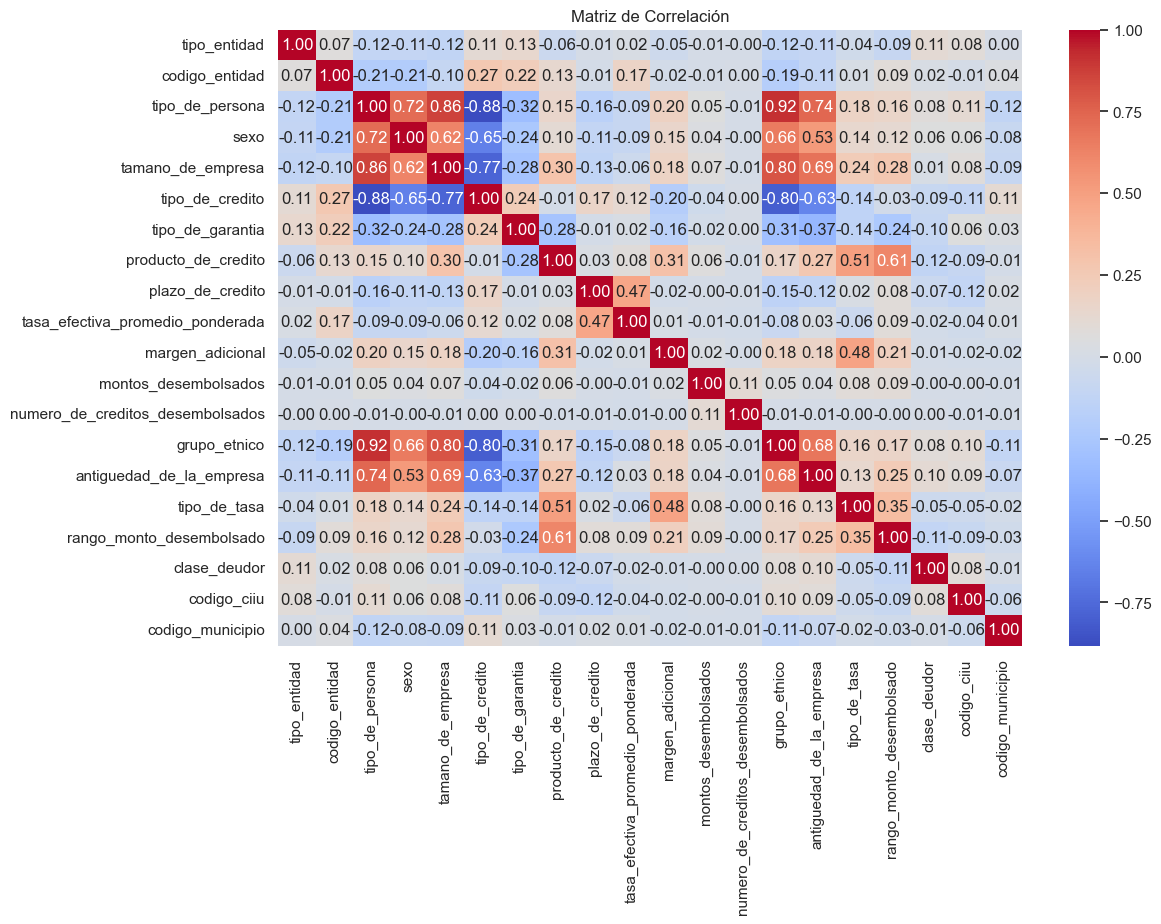

In [10]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para visualizaciones
sns.set(style="whitegrid")

# 1. Cargar el conjunto de datos
df = pd.read_csv('TasasCredito_V12_.csv')

# 2. Revisión de la estructura del DataFrame
print("Estructura del conjunto de datos:")
print(df.info())

print("\nPrimeras filas del conjunto de datos:")
print(df.head())

# 3. Cálculo de estadísticas descriptivas
print("\nEstadísticas descriptivas generales:")
print(df.describe(include='all'))  # 'include="all"' muestra estadísticas para todas las columnas, incluidas las categóricas

# 4. Identificación de valores faltantes
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values[missing_values > 0])  # Solo se muestran columnas con valores faltantes

# 5. Identificación de duplicados
duplicates_count = df.duplicated().sum()
print("\nNúmero de filas duplicadas:", duplicates_count)

# 6. Análisis y visualización de la distribución de la tasa de interés (E.A.)
print("\nDistribución de la tasa de interés (E.A.):")
print(df['tasa_efectiva_promedio_ponderada'].describe())

# Histograma y KDE para la tasa de interés
plt.figure(figsize=(10, 6))
sns.histplot(df['tasa_efectiva_promedio_ponderada'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribución de la Tasa Efectiva Promedio Ponderada (E.A.)')
plt.xlabel('Tasa de interés (E.A.)')
plt.ylabel('Frecuencia')
plt.show()

# 7. Boxplot para detectar posibles outliers en la tasa de interés
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tasa_efectiva_promedio_ponderada'], color='salmon')
plt.title('Boxplot de la Tasa de Interés (E.A.)')
plt.xlabel('Tasa de interés (E.A.)')
plt.show()

# 8. Cálculo de percentiles de la tasa de interés (E.A.)
percentiles = np.percentile(df['tasa_efectiva_promedio_ponderada'].dropna(), [25, 50, 75])
print("\nPercentiles de la tasa de interés (E.A.):")
print(f"25th Percentile: {percentiles[0]:.2f}")
print(f"50th Percentile (Mediana): {percentiles[1]:.2f}")
print(f"75th Percentile: {percentiles[2]:.2f}")

# 9. Análisis de correlaciones
# Filtrar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nColumnas numéricas para el análisis de correlación:", numeric_cols.tolist())

plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()  # Usar solo las columnas numéricas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlación')
plt.show()

# Fin del análisis inicial

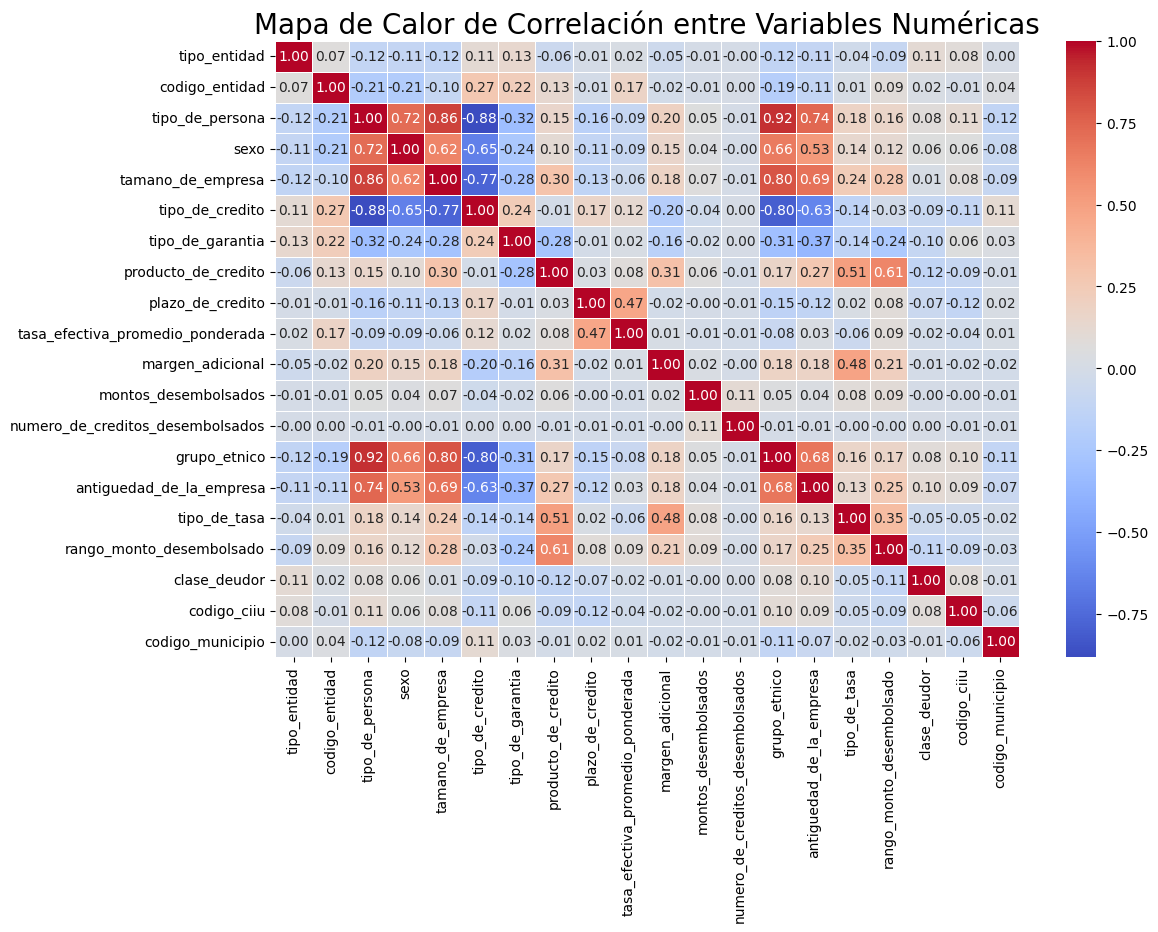

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('TasasCredito_V12.csv')

# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Configuración general del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Añadir título
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=20)

# Mostrar el gráfico
plt.show()


Objetivo 2:

●	Aplicar y comparar métodos de Machine Learning y enfoques estadísticos para la detección de outliers en los datos, evaluando su efectividad en térmi-nos de precisión y sensibilidad.

2.1. Metodos Estadisticos

Rango Intercuartílico (IQR)

In [ ]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('TasasCredito_V12.csv')

# Paso 1: Calcular Q1 y Q3
Q1 = data['tasa_efectiva_promedio_ponderada'].quantile(0.25)
Q3 = data['tasa_efectiva_promedio_ponderada'].quantile(0.75)

# Paso 2: Calcular el IQR
IQR = Q3 - Q1

# Paso 3: Identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['tasa_efectiva_promedio_ponderada'] < lower_bound) |
                (data['tasa_efectiva_promedio_ponderada'] > upper_bound)]

# Resultado: mostrar los outliers identificados
print("Outliers identificados:")
print(outliers)

# Opcional: mostrar estadísticas descriptivas de la tasa de interés
print("\nEstadísticas descriptivas:")
print(data['tasa_efectiva_promedio_ponderada'].describe())

Outliers identificados:
Empty DataFrame
Columns: [tipo_entidad, codigo_entidad, fecha_corte, tipo_de_persona, sexo, tamano_de_empresa, tipo_de_credito, tipo_de_garantia, producto_de_credito, plazo_de_credito, tasa_efectiva_promedio_ponderada, margen_adicional, montos_desembolsados, numero_de_creditos_desembolsados, grupo_etnico, antiguedad_de_la_empresa, tipo_de_tasa, rango_monto_desembolsado, clase_deudor, codigo_ciiu, codigo_municipio]
Index: []

[0 rows x 21 columns]

Estadísticas descriptivas:
count    1.141181e+07
mean     2.533587e+01
std      1.647551e+01
min      0.000000e+00
25%      1.540000e+00
50%      3.261000e+01
75%      3.799000e+01
max      8.408000e+01
Name: tasa_efectiva_promedio_ponderada, dtype: float64


Mahalanobis Distance

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

# Cargar los datos
data = pd.read_csv('TasasCredito_V12.csv')

# Extraer la columna de interés (la tasa de interés)
tasa_interes = data['tasa_efectiva_promedio_ponderada'].values

# Paso 1: Calcular la media y la desviación estándar
mean = np.mean(tasa_interes)
std_dev = np.std(tasa_interes)

# Paso 2: Calcular la distancia de Mahalanobis (usando la desviación estándar)
# La distancia de Mahalanobis para una variable univariante es simplemente el número de desviaciones estándar que un punto está alejado de la media
mahalanobis_distances = [(x - mean) / std_dev for x in tasa_interes]

# Paso 3: Definir un umbral para clasificar los outliers
# Usaremos un nivel de significancia del 95% y convertimos el umbral a una medida comparable
  # Se toma la raíz para obtener el umbral correspondiente en desviaciones estándar

# Identificar outliers
outliers = data[np.abs(mahalanobis_distances) > threshold]

# Resultado: mostrar los outliers identificados
print("Outliers identificados usando la distancia de Mahalanobis:")
print(outliers)

# Opcional: mostrar estadísticas descriptivas de la tasa de interés
print("\nEstadísticas descriptivas:")
print(data['tasa_efectiva_promedio_ponderada'].describe())

Outliers identificados usando la distancia de Mahalanobis:
         tipo_entidad  codigo_entidad fecha_corte  tipo_de_persona  sexo  \
183                 1            53.0  2024-05-03                1     1   
286                 1            60.0  2024-05-03                1     1   
342                 1            60.0  2024-05-03                1     2   
357                 1            68.0  2024-05-03                1     1   
587                 1            53.0  2024-05-03                2     3   
...               ...             ...         ...              ...   ...   
4887090             1            52.0  2024-01-05                1     2   
4896113             1            60.0  2024-01-05                1     2   
4910542             1            53.0  2024-01-05                1     1   
4938634             1            52.0  2024-01-05                1     1   
4941999             1            53.0  2024-01-05                1     1   

         tamano_de_empresa  

Z-score

In [ ]:
import pandas as pd
import numpy as np

# Cargar los datos
data = pd.read_csv('TasasCredito_V12.csv')

# Extraer la columna de interés (la tasa de interés)
tasa_interes = data['tasa_efectiva_promedio_ponderada'].values

# Paso 1: Calcular la media y la desviación estándar
mean = np.mean(tasa_interes)
std_dev = np.std(tasa_interes)

# Paso 2: Calcular el Z-score para cada valor
z_scores = [(x - mean) / std_dev for x in tasa_interes]

# Paso 3: Definir el umbral y clasificar outliers
threshold = 3  # Comúnmente, se considera un outlier si el Z-score es mayor que 3 o menor que -3
outliers = data[(np.abs(z_scores) > threshold)]

# Resultado: mostrar los outliers identificados
print("Outliers identificados usando Z-score:")
print(outliers)

# Opcional: mostrar estadísticas descriptivas de la tasa de interés
print("\nEstadísticas descriptivas:")
print(data['tasa_efectiva_promedio_ponderada'].describe())

Outliers identificados usando Z-score:
         tipo_entidad  codigo_entidad fecha_corte  tipo_de_persona  sexo  \
810                 1            62.0  2024-05-03                1     2   
1314                1            62.0  2024-05-03                1     1   
3469                1            62.0  2024-05-03                1     2   
5211                1            62.0  2024-05-03                1     1   
5522                1            62.0  2024-05-03                1     2   
...               ...             ...         ...              ...   ...   
2744637             1            62.0  2024-05-17                1     1   
2747913             1            62.0  2024-05-17                1     1   
2752822             1            62.0  2024-05-17                1     2   
2754200             1            62.0  2024-05-17                1     1   
2764888             1            62.0  2024-05-17                1     2   

         tamano_de_empresa  tipo_de_credito  tip

Desviación Estándar

Outliers identificados por desviación estándar:
         tipo_entidad  codigo_entidad fecha_corte  tipo_de_persona  sexo  \
37333               1            51.0  2024-05-03                1     1   
267829              1            51.0  2024-05-03                1     2   
281414              1            51.0  2024-05-03                1     1   
317183              1            51.0  2024-05-03                1     2   
318783              1            51.0  2024-05-03                1     1   
332587              1            51.0  2024-05-03                1     1   
363865              1            51.0  2024-05-03                1     1   
376636              1            51.0  2024-05-03                1     1   
696152              1            51.0  2024-05-10                1     2   
892095              1            51.0  2024-05-10                1     2   
982832              1            51.0  2024-05-17                1     2   
1380822             1            51.0  2

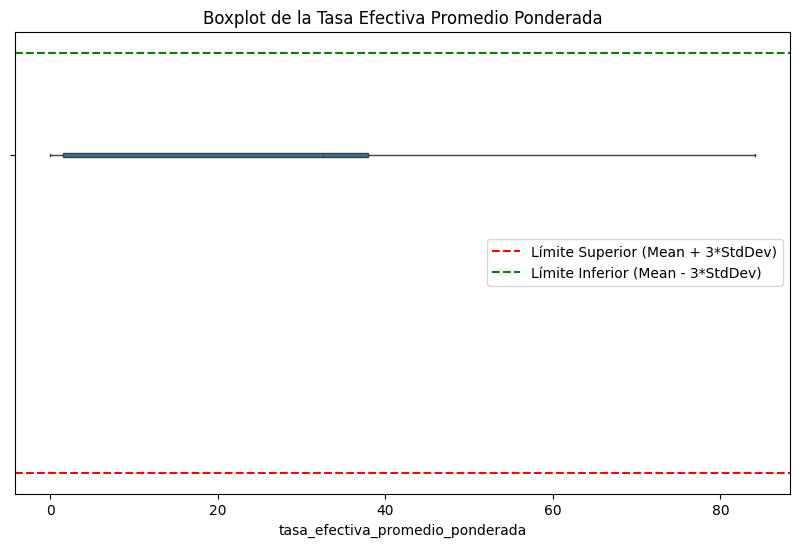

In [ ]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('TasasCredito_V12.csv')

# Calcular la media y la desviación estándar
mean = data['tasa_efectiva_promedio_ponderada'].mean()
std_dev = data['tasa_efectiva_promedio_ponderada'].std()

# Identificar outliers
outliers_std = data[(data['tasa_efectiva_promedio_ponderada'] < (mean - 3 * std_dev)) |
                    (data['tasa_efectiva_promedio_ponderada'] > (mean + 3 * std_dev))]

# Mostrar los outliers identificados
print("Outliers identificados por desviación estándar:")
print(outliers_std)

# Opcional: mostrar estadísticas descriptivas de la tasa de interés
print("\nEstadísticas descriptivas:")
print(data['tasa_efectiva_promedio_ponderada'].describe())

# Visualizar los outliers en un boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['tasa_efectiva_promedio_ponderada'])
plt.title('Boxplot de la Tasa Efectiva Promedio Ponderada')
plt.axhline(mean + 3 * std_dev, color='red', linestyle='--', label='Límite Superior (Mean + 3*StdDev)')
plt.axhline(mean - 3 * std_dev, color='green', linestyle='--', label='Límite Inferior (Mean - 3*StdDev)')
plt.legend()
plt.show()

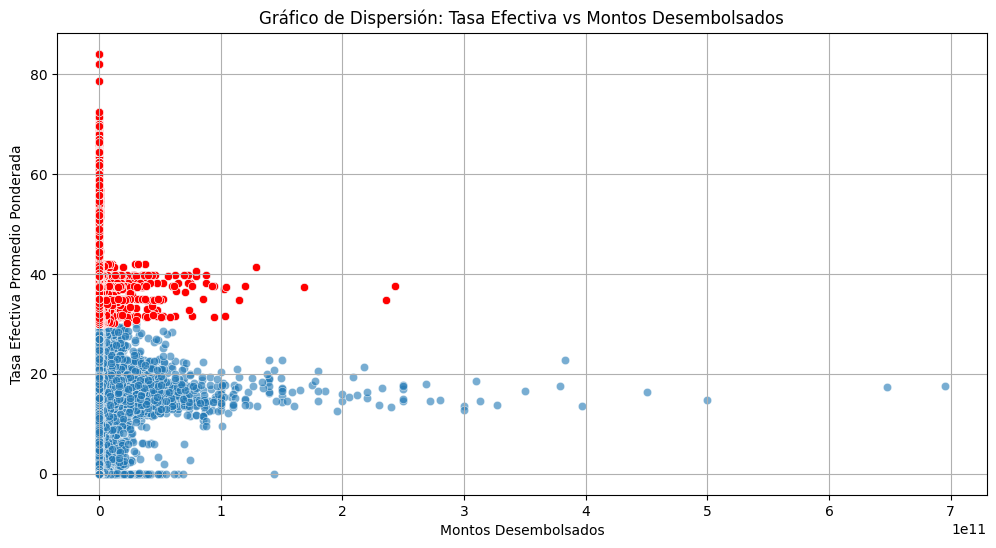

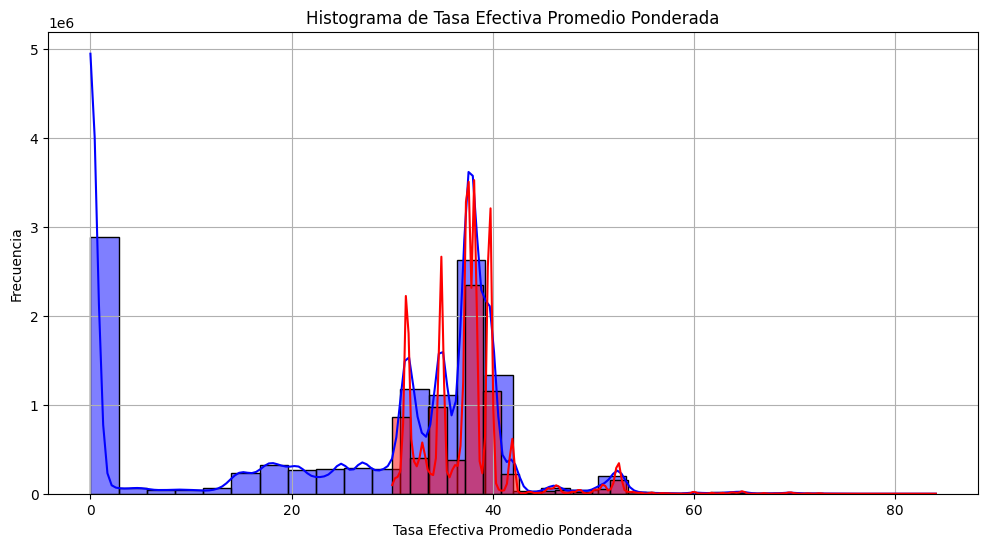

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar tus datos
df = pd.read_csv('TasasCredito_V12.csv')

# Supongamos que ya has identificado los outliers
outlier_condition = (df['tasa_efectiva_promedio_ponderada'] > 30)  # Ejemplo de condición de outlier
outliers = df[outlier_condition]

# 1. Gráfico de Dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='montos_desembolsados', y='tasa_efectiva_promedio_ponderada',
                alpha=0.6)
sns.scatterplot(data=outliers, x='montos_desembolsados', y='tasa_efectiva_promedio_ponderada',
                color='red', marker='o')
plt.title('Gráfico de Dispersión: Tasa Efectiva vs Montos Desembolsados')
plt.xlabel('Montos Desembolsados')
plt.ylabel('Tasa Efectiva Promedio Ponderada')
plt.grid()
plt.show()

# 2. Histograma de la Tasa Efectiva Promedio Ponderada
plt.figure(figsize=(12, 6))
sns.histplot(df['tasa_efectiva_promedio_ponderada'], bins=30, kde=True, color='blue', alpha=0.5)
sns.histplot(outliers['tasa_efectiva_promedio_ponderada'], bins=30, kde=True, color='red', alpha=0.5)
plt.title('Histograma de Tasa Efectiva Promedio Ponderada')
plt.xlabel('Tasa Efectiva Promedio Ponderada')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


In [ ]:
pip install pandas scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


2.2. Metodos de Machine Learning

K-means

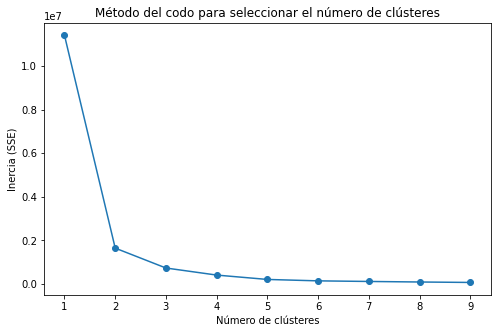

Número de outliers detectados (percentil 99): 109643
Índices de los outliers detectados (percentil 99): [     183      286      342 ... 11411668 11411684 11411777]
Tasas de interés de los outliers detectados (percentil 99): [64.9  60.9  60.9  ... 58.8  61.79 57.8 ]
Número de outliers detectados (3 desviaciones estándar): 277591
Índices de los outliers detectados (3 desviaciones estándar): [     183      286      342 ... 11411684 11411777 11411804]
Tasas de interés de los outliers detectados (3 desviaciones estándar): [64.9  60.9  60.9  ... 61.79 57.8  51.8 ]


C:\WinPython\python-3.9.10.amd64\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


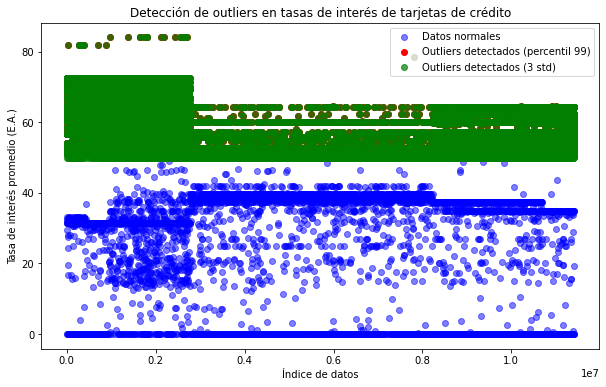

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el dataset de tasas de interés
df = pd.read_csv('TasasCredito_V12.csv')

# Paso 1: Seleccionar la columna de tasa de interés promedio (asegúrate de cambiar el nombre según tu dataset)
tasa_interes = df['tasa_efectiva_promedio_ponderada'].values

# Paso 2: Escalar los datos (normalizar las tasas de interés)
scaler = StandardScaler()
tasa_interes_scaled = scaler.fit_transform(tasa_interes.reshape(-1, 1))

# Paso 3: Método del codo para determinar el número óptimo de clústeres
sse = []  # Suma de errores al cuadrado
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tasa_interes_scaled)
    sse.append(kmeans.inertia_)  # Inercia: suma de las distancias cuadradas de los puntos al centroide más cercano

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Método del codo para seleccionar el número de clústeres')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia (SSE)')
plt.show()

# Usar el número de clústeres basado en el método del codo (ajustar según la gráfica del codo)
n_clusters = 3  # Ajusta este valor según los resultados del método del codo

# Paso 4: Aplicar K-Means con el número de clústeres óptimo
kmeans = KMeans(n_clusters=n_clusters, random_state=60)
kmeans.fit(tasa_interes_scaled)

# Paso 5: Calcular la distancia de cada punto a su centroide más cercano
distances = kmeans.transform(tasa_interes_scaled)
min_distances = np.min(distances, axis=1)  # Distancia mínima al centroide más cercano

# Paso 6: Definir un umbral basado en el percentil 99
threshold = np.percentile(min_distances, 99)  # Cambia al percentil 99

# Identificar los índices de los outliers
outliers_indices = np.where(min_distances > threshold)[0]

# Paso 7: Filtro opcional de outliers basado en desviaciones estándar
mean_distance = np.mean(min_distances)
std_distance = np.std(min_distances)
threshold_std = mean_distance + 3 * std_distance  # Filtrar más allá de 3 desviaciones estándar
outliers_indices_std = np.where(min_distances > threshold_std)[0]

# Obtener las tasas de interés correspondientes a los outliers (ambos métodos)
outlier_values = tasa_interes[outliers_indices]
outlier_values_std = tasa_interes[outliers_indices_std]

# Mostrar resultados
print(f"Número de outliers detectados (percentil 99): {len(outliers_indices)}")
print("Índices de los outliers detectados (percentil 99):", outliers_indices)
print("Tasas de interés de los outliers detectados (percentil 99):", outlier_values)

print(f"Número de outliers detectados (3 desviaciones estándar): {len(outliers_indices_std)}")
print("Índices de los outliers detectados (3 desviaciones estándar):", outliers_indices_std)
print("Tasas de interés de los outliers detectados (3 desviaciones estándar):", outlier_values_std)

# Paso 8: Visualización de los resultados
# Muestra aleatoria de datos normales para mejorar el rendimiento
normal_indices = np.setdiff1d(np.arange(len(tasa_interes)), outliers_indices)
sampled_normal_indices = np.random.choice(normal_indices, size=5000, replace=False)  # Tomar una muestra aleatoria

# Graficar los outliers y los datos normales
plt.figure(figsize=(10, 6))
plt.scatter(sampled_normal_indices, tasa_interes[sampled_normal_indices], label='Datos normales', color='blue', alpha=0.5)
plt.scatter(outliers_indices, outlier_values, color='red', label='Outliers detectados (percentil 99)')
plt.scatter(outliers_indices_std, outlier_values_std, color='green', label='Outliers detectados (3 std)', alpha=0.7)
plt.title('Detección de outliers en tasas de interés de tarjetas de crédito')
plt.xlabel('Índice de datos')
plt.ylabel('Tasa de interés promedio (E.A.)')
plt.legend()
plt.show()


Número de clústeres | Inercia (SSE)
1                 | 11411802.000060864
2                 | 1643936.6639098271
3                 | 730948.8395482028
4                 | 406740.7801704323
5                 | 206102.41206768935
6                 | 141434.81582936322
7                 | 119745.7907332424
8                 | 126953.1040680358
9                 | 86265.33318513607


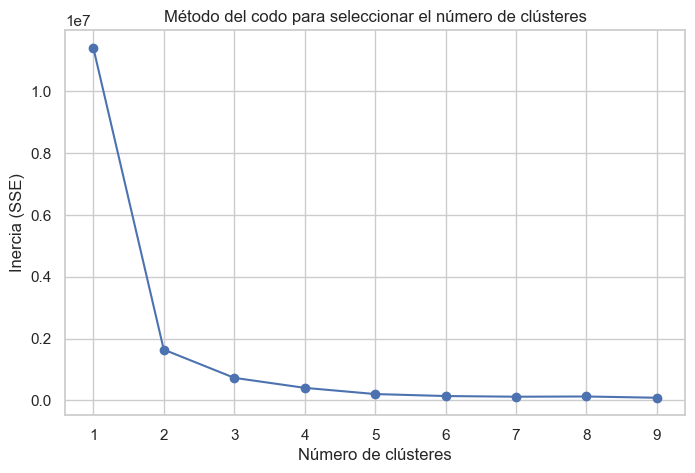

Número de outliers detectados (percentil 99): 109643
Índices de los outliers detectados (percentil 99): [     183      286      342 ... 11411664 11411680 11411773]
Tasas de interés de los outliers detectados (percentil 99): [64.9  60.9  60.9  ... 58.8  61.79 57.8 ]
Número de outliers detectados (3 desviaciones estándar): 227427
Índices de los outliers detectados (3 desviaciones estándar): [     183      286      342 ... 11411680 11411773 11411800]
Tasas de interés de los outliers detectados (3 desviaciones estándar): [64.9  60.9  60.9  ... 61.79 57.8  51.8 ]


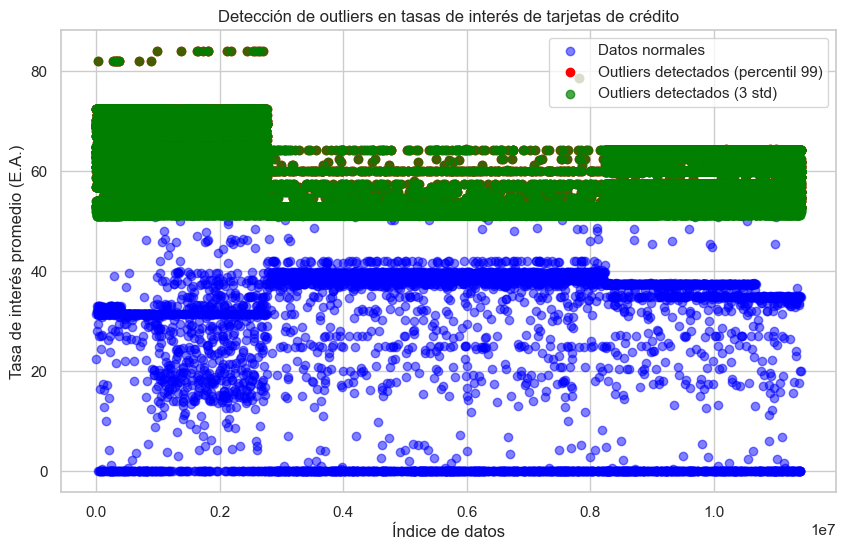

In [11]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el dataset de tasas de interés
df = pd.read_csv('TasasCredito_V12_.csv')

# Paso 1: Seleccionar la columna de tasa de interés promedio
tasa_interes = df['tasa_efectiva_promedio_ponderada'].values

# Paso 2: Escalar los datos (normalizar las tasas de interés)
scaler = StandardScaler()
tasa_interes_scaled = scaler.fit_transform(tasa_interes.reshape(-1, 1))

# Paso 3: Método del codo para determinar el número óptimo de clústeres
sse = []  # Lista para almacenar la inercia (SSE)
print("Número de clústeres | Inercia (SSE)")  # Encabezado para la tabla
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tasa_interes_scaled)
    sse.append(kmeans.inertia_)  # Inercia: suma de las distancias cuadradas de los puntos al centroide más cercano
    print(f"{k}                 | {kmeans.inertia_}")  # Imprimir el número de clústeres y la inercia (SSE)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Método del codo para seleccionar el número de clústeres')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia (SSE)')
plt.show()

# Usar el número de clústeres basado en el método del codo (ajustar según la gráfica del codo)
n_clusters = 3  # Ajusta este valor según los resultados del método del codo

# Paso 4: Aplicar K-Means con el número de clústeres óptimo
kmeans = KMeans(n_clusters=n_clusters, random_state=60)
kmeans.fit(tasa_interes_scaled)

# Paso 5: Calcular la distancia de cada punto a su centroide más cercano
distances = kmeans.transform(tasa_interes_scaled)
min_distances = np.min(distances, axis=1)  # Distancia mínima al centroide más cercano

# Paso 6: Definir un umbral basado en el percentil 99
threshold = np.percentile(min_distances, 99)

# Identificar los índices de los outliers
outliers_indices = np.where(min_distances > threshold)[0]

# Paso 7: Filtro opcional de outliers basado en desviaciones estándar
mean_distance = np.mean(min_distances)
std_distance = np.std(min_distances)
threshold_std = mean_distance + 3 * std_distance
outliers_indices_std = np.where(min_distances > threshold_std)[0]

# Obtener las tasas de interés correspondientes a los outliers (ambos métodos)
outlier_values = tasa_interes[outliers_indices]
outlier_values_std = tasa_interes[outliers_indices_std]

# Mostrar resultados de los outliers
print(f"Número de outliers detectados (percentil 99): {len(outliers_indices)}")
print("Índices de los outliers detectados (percentil 99):", outliers_indices)
print("Tasas de interés de los outliers detectados (percentil 99):", outlier_values)

print(f"Número de outliers detectados (3 desviaciones estándar): {len(outliers_indices_std)}")
print("Índices de los outliers detectados (3 desviaciones estándar):", outliers_indices_std)
print("Tasas de interés de los outliers detectados (3 desviaciones estándar):", outlier_values_std)

# Paso 8: Visualización de los resultados
# Muestra aleatoria de datos normales para mejorar el rendimiento
normal_indices = np.setdiff1d(np.arange(len(tasa_interes)), outliers_indices)
sampled_normal_indices = np.random.choice(normal_indices, size=5000, replace=False)  # Tomar una muestra aleatoria

# Graficar los outliers y los datos normales
plt.figure(figsize=(10, 6))
plt.scatter(sampled_normal_indices, tasa_interes[sampled_normal_indices], label='Datos normales', color='blue', alpha=0.5)
plt.scatter(outliers_indices, outlier_values, color='red', label='Outliers detectados (percentil 99)')
plt.scatter(outliers_indices_std, outlier_values_std, color='green', label='Outliers detectados (3 std)', alpha=0.7)
plt.title('Detección de outliers en tasas de interés de tarjetas de crédito')
plt.xlabel('Índice de datos')
plt.ylabel('Tasa de interés promedio (E.A.)')
plt.legend()
plt.show()

DBSCAN: Costoso en cuanto a memoria

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, f1_score
from scipy import stats
from sklearn.model_selection import train_test_split

# Leer una muestra del dataset (10% por ejemplo)
df = pd.read_csv('TasasCredito_V12.csv', usecols=['tasa_efectiva_promedio_ponderada'])
df = df.sample(frac=0.1, random_state=42)  # Cambia el valor si necesitas más o menos datos

# Eliminar filas con NaN
df.dropna(inplace=True)

# Convertir la columna a float32
df['tasa_efectiva_promedio_ponderada'] = df['tasa_efectiva_promedio_ponderada'].astype(np.float32)

# Extraer la columna de interés
tasa_interes = df['tasa_efectiva_promedio_ponderada'].values

# Crear etiquetas de verdad para los outliers
z_scores = stats.zscore(tasa_interes)
true_outliers = (abs(z_scores) > 3).astype(int)

# Preparar los datos para la evaluación
X_train, X_test, y_train, y_test = train_test_split(tasa_interes.reshape(-1, 1), true_outliers, test_size=0.2, random_state=42)

# Ajuste de hiperparámetros para DBSCAN
eps_values = [0.1, 0.2]
min_samples_values = [5, 10]

def evaluate_model(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    return precision, sensitivity

# Bucle para encontrar los mejores parámetros
best_f1 = 0
best_eps = None
best_min_samples = None
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred_dbscan = dbscan.fit_predict(X_test)
        y_pred_dbscan = (y_pred_dbscan == -1).astype(int)

        # Evaluar el modelo
        f1 = f1_score(y_test, y_pred_dbscan)

        # Guardar los mejores parámetros
        if f1 > best_f1:
            best_f1 = f1
            best_eps = eps
            best_min_samples = min_samples

# Imprimir los mejores resultados
print("Mejores parámetros encontrados para DBSCAN:")
print(f"eps: {best_eps}, min_samples: {best_min_samples}")
print(f"F1 Score: {best_f1:.4f}")

Mejores parámetros encontrados para DBSCAN:
eps: None, min_samples: None
F1 Score: 0.0000


K-Nearest Neighbors (KNN)

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('TasasCredito_V12_.csv')

# Extraer la columna de interés (la tasa de interés)
tasa_interes = df['tasa_efectiva_promedio_ponderada'].values.reshape(-1, 1)

# Paso 1: Definir el número de vecinos
n_neighbors = 5  # Puedes ajustar este valor según sea necesario

# Paso 2: Ajustar el modelo de KNN
nbrs = NearestNeighbors(n_neighbors=n_neighbors)
nbrs.fit(tasa_interes)

# Paso 3: Obtener las distancias a los vecinos más cercanos
distances, indices = nbrs.kneighbors(tasa_interes)

# Paso 4: Calcular la distancia promedio para cada punto
mean_distances = distances.mean(axis=1)

# Paso 5: Definir un umbral para clasificar outliers
threshold = np.percentile(mean_distances, 95)  # Usamos el percentil 95 como umbral

# Paso 6: Clasificar como outliers aquellos puntos con una distancia mayor al umbral
outliers = np.where(mean_distances > threshold)[0]

# Paso 7: Calcular el nivel de balanceo
total_filas = len(df)  # Total de registros en el dataset
num_outliers = len(outliers)  # Número de outliers detectados
num_normales = total_filas - num_outliers  # Número de puntos normales

# Cálculo de las proporciones
porcentaje_outliers = (num_outliers / total_filas) * 100
porcentaje_normales = (num_normales / total_filas) * 100

# Paso 8: Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(tasa_interes)), tasa_interes, color='blue', label='Datos Normales')
plt.scatter(outliers, tasa_interes[outliers], color='red', label='Outliers')
plt.title('Detección de Outliers en Tasas de Interés con KNN')
plt.xlabel('Índice')
plt.ylabel('Tasa de Interés Efectiva Promedio Ponderada')
plt.legend()
plt.show()

# Paso 9: Imprimir resultados
print(f"Número total de filas: {total_filas}")
print(f"Número de outliers detectados: {num_outliers}")
print(f"Número de puntos normales: {num_normales}")
print(f"Porcentaje de outliers: {porcentaje_outliers:.2f}%")
print(f"Porcentaje de puntos normales: {porcentaje_normales:.2f}%")
print("Índices de los outliers:", outliers)
print("Tasas de interés que son outliers:", tasa_interes[outliers])

Isolation Forest

Outliers detectados por Isolation Forest: 41312
Outliers detectados por Desviación Estándar: 2877

Primeros outliers detectados por Isolation Forest:
     tipo_entidad  codigo_entidad fecha_corte  tipo_de_persona  sexo  \
45              1            39.0  2024-05-03                1     2   
183             1            53.0  2024-05-03                1     1   
286             1            60.0  2024-05-03                1     1   
342             1            60.0  2024-05-03                1     2   
357             1            68.0  2024-05-03                1     1   

     tamano_de_empresa  tipo_de_credito  tipo_de_garantia  \
45                   1                5                 4   
183                  2                6                 1   
286                  2                6                 4   
342                  2                6                 4   
357                  2                6                 3   

     producto_de_credito  plazo_de_credito  ...  m

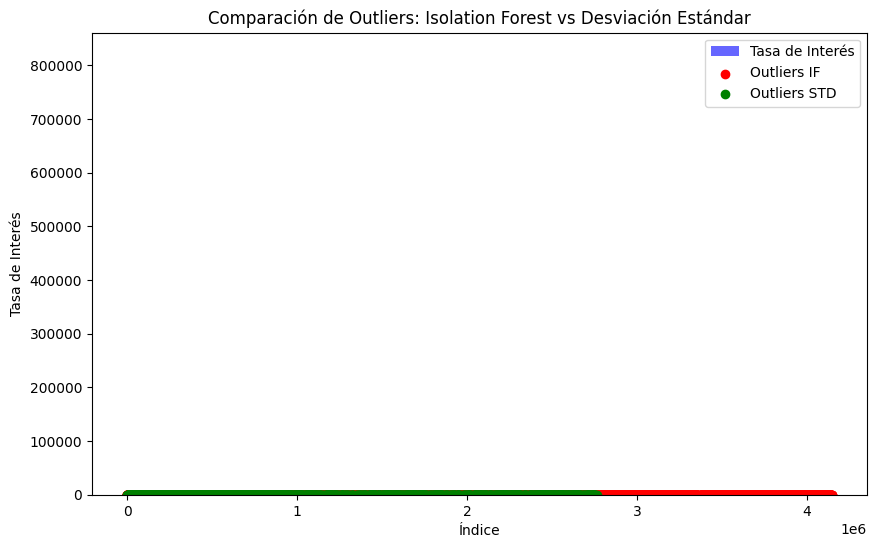

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.ensemble import IsolationForest
from scipy import stats

# Cargar el dataset
# Suponemos que el archivo 'tasascredito.csv' contiene una columna llamada 'tasa_efectiva_promedio_ponderada'
df = pd.read_csv('TasasCredito_V12.csv')

# Extraer la columna de interés (la tasa de interés)
tasa_interes = df['tasa_efectiva_promedio_ponderada']

# Paso 1: Detección de outliers utilizando Isolation Forest
# Inicializar el modelo de Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Ajustar y predecir las etiquetas (outliers o no) en la columna de tasa de interés
df['anomaly_if'] = iso_forest.fit_predict(tasa_interes.values.reshape(-1, 1))

# En Isolation Forest, -1 indica un outlier, mientras que 1 indica un valor normal
outliers_if = df[df['anomaly_if'] == -1]

# Paso 2: Detección de outliers utilizando la desviación estándar (Z-Score)
# Calcular el Z-Score para cada valor de tasa de interés
df['z_score'] = stats.zscore(tasa_interes)

# Identificar outliers donde el Z-Score sea mayor a 3 o menor a -3
df['anomaly_std'] = df['z_score'].apply(lambda x: 1 if abs(x) > 3 else 0)

# Outliers detectados por desviación estándar
outliers_std = df[df['anomaly_std'] == 1]

# Paso 3: Comparación de resultados
# Contar los outliers detectados por ambos métodos
num_outliers_if = len(outliers_if)
num_outliers_std = len(outliers_std)

print(f'Outliers detectados por Isolation Forest: {num_outliers_if}')
print(f'Outliers detectados por Desviación Estándar: {num_outliers_std}')

# Mostrar los primeros outliers detectados por ambos métodos para comparar
print("\nPrimeros outliers detectados por Isolation Forest:")
print(outliers_if.head())

print("\nPrimeros outliers detectados por Desviación Estándar:")
print(outliers_std.head())

# Visualización (opcional)
import matplotlib.pyplot as plt

# Histograma de las tasas de interés
plt.figure(figsize=(10,6))
plt.hist(tasa_interes, bins=50, alpha=0.6, color='b', label='Tasa de Interés')

# Marcar los outliers detectados por Isolation Forest
plt.scatter(outliers_if.index, outliers_if['tasa_efectiva_promedio_ponderada'], color='r', label='Outliers IF')

# Marcar los outliers detectados por Desviación Estándar
plt.scatter(outliers_std.index, outliers_std['tasa_efectiva_promedio_ponderada'], color='g', label='Outliers STD')

plt.xlabel('Índice')
plt.ylabel('Tasa de Interés')
plt.legend()
plt.title('Comparación de Outliers: Isolation Forest vs Desviación Estándar')
plt.show()


Local Outlier Factor (LOF)

Outliers detectados por Local Outlier Factor: 8019
Outliers detectados por Desviación Estándar: 7033

Primeros outliers detectados por LOF:
      tipo_entidad  codigo_entidad fecha_corte  tipo_de_persona  sexo  \
244              1             7.0  2024-05-03                1     2   
438              1            39.0  2024-05-03                1     1   
611              1            62.0  2024-05-03                1     1   
1489             4            26.0  2024-05-03                1     1   
2393             1            39.0  2024-04-26                1     2   

      tamano_de_empresa  tipo_de_credito  tipo_de_garantia  \
244                   1                5                 4   
438                   1                5                 4   
611                   2                6                 4   
1489                  1                5                 4   
2393                  1                5                 4   

      producto_de_credito  plazo_de_credito  ...

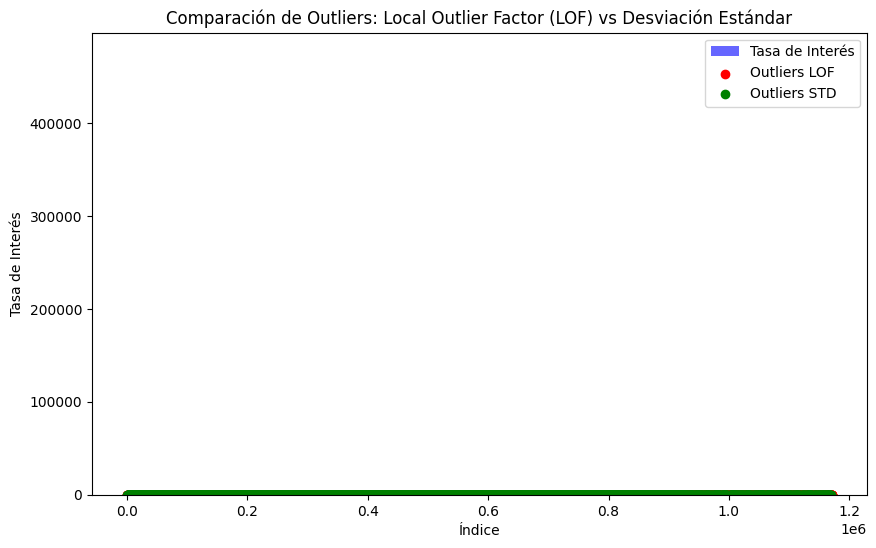

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('TasasCredito_V12.csv')

# Extraer la columna de interés (la tasa de interés)
tasa_interes = df['tasa_efectiva_promedio_ponderada']

# Verificar y manejar valores faltantes
df = df.dropna(subset=['tasa_efectiva_promedio_ponderada'])

# Paso 1: Detección de outliers utilizando Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# Ajustar y predecir las etiquetas (outliers o no) en la columna de tasa de interés
df['anomaly_lof'] = lof.fit_predict(tasa_interes.values.reshape(-1, 1))

# En LOF, -1 indica un outlier, mientras que 1 in _:_ ,dica un valor normal
outliers_lof = df[df['anomaly_lof'] == -1]

# Paso 2: Detección de outliers utilizando la desviación estándar (Z-Score)
df['z_score'] = stats.zscore(tasa_interes)

# Identificar outliers donde el Z-Score sea mayor a 3 o menor a -3
df['anomaly_std'] = df['z_score'].apply(lambda x: 1 if abs(x) > 3 else 0)

# Outliers detectados por desviación estándar
outliers_std = df[df['anomaly_std'] == 1]

# Paso 3: Comparación de resultados
num_outliers_lof = len(outliers_lof)
num_outliers_std = len(outliers_std)

print(f'Outliers detectados por Local Outlier Factor: {num_outliers_lof}')
print(f'Outliers detectados por Desviación Estándar: {num_outliers_std}')

# Mostrar los primeros outliers detectados por ambos métodos para comparar
print("\nPrimeros outliers detectados por LOF:")
print(outliers_lof.head())

print("\nPrimeros outliers detectados por Desviación Estándar:")
print(outliers_std.head())

# Paso 4: Visualización de los resultados
plt.figure(figsize=(10,6))
plt.hist(tasa_interes, bins=50, alpha=0.6, color='b', label='Tasa de Interés')

# Marcar los outliers detectados por LOF
plt.scatter(outliers_lof.index, outliers_lof['tasa_efectiva_promedio_ponderada'], color='r', label='Outliers LOF')

# Marcar los outliers detectados por Desviación Estándar
plt.scatter(outliers_std.index, outliers_std['tasa_efectiva_promedio_ponderada'], color='g', label='Outliers STD')

plt.xlabel('Índice')
plt.ylabel('Tasa de Interés')
plt.legend()
plt.title('Comparación de Outliers: Local Outlier Factor (LOF) vs Desviación Estándar')
plt.show()

SVM (One-Class SVM)

Outliers detectados por Isolation Forest: 4699
Outliers detectados por Desviación Estándar: 2538
Outliers detectados por SVM: 124353

Primeros outliers detectados por SVM:
    tipo_entidad  codigo_entidad fecha_corte  tipo_de_persona  sexo  \
0              1             1.0  2024-05-03                1     1   
4              1            39.0  2024-04-26                1     1   
5              1             7.0  2024-05-03                2     3   
12             1             1.0  2024-05-03                1     2   
15             1             7.0  2024-05-03                1     1   

    tamano_de_empresa  tipo_de_credito  tipo_de_garantia  producto_de_credito  \
0                   1                5                 4                    1   
4                   1                5                 4                    3   
5                   2                2                 1                    2   
12                  2                2                 4                    2

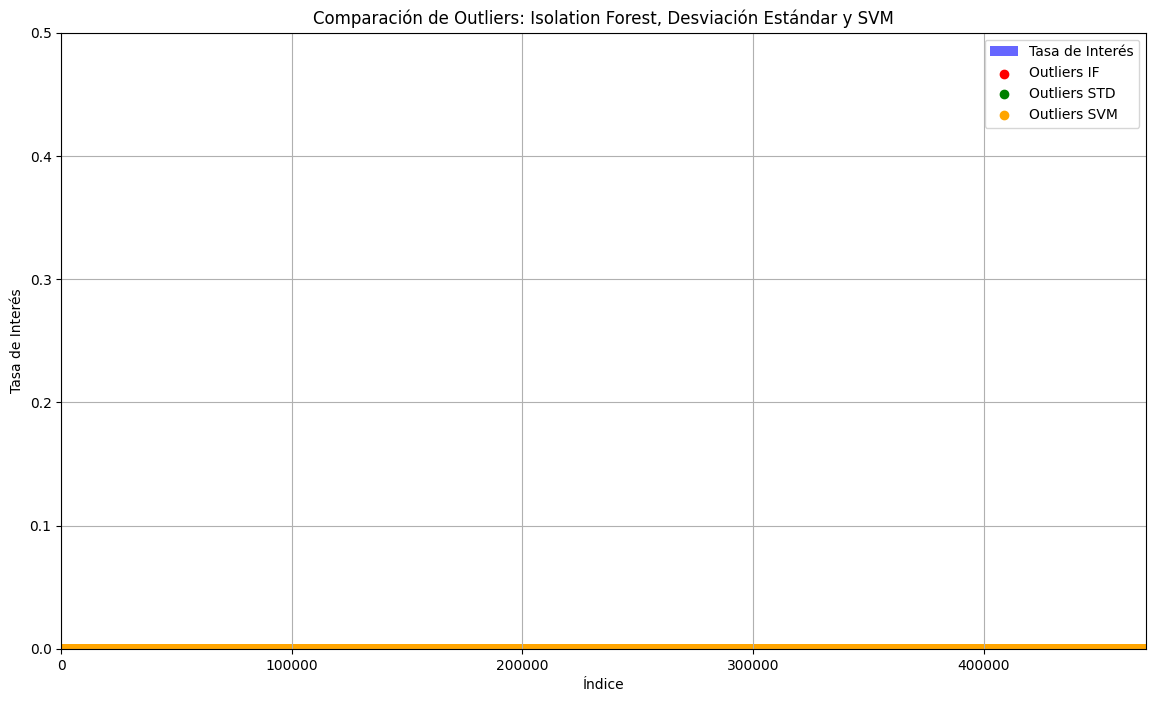

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from scipy import stats
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

# Cargar el dataset
df = pd.read_csv('TasasCredito_V12.csv')

# Extraer la columna de interés (la tasa de interés)
tasa_interes = df['tasa_efectiva_promedio_ponderada'].values.reshape(-1, 1)

# Función para la detección de outliers utilizando Isolation Forest
def detect_outliers_isolation_forest(data):
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    return iso_forest.fit_predict(data)

# Función para la detección de outliers utilizando Z-Score
def detect_outliers_z_score(data):
    z_scores = stats.zscore(data)
    return (abs(z_scores) > 3).astype(int)

# Función para la detección de outliers utilizando One-Class SVM
def detect_outliers_svm(data):
    svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.01)
    return svm_model.fit_predict(data)

# Paso 1: Ejecutar las detecciones en paralelo
with ThreadPoolExecutor() as executor:
    future_if = executor.submit(detect_outliers_isolation_forest, tasa_interes)
    future_std = executor.submit(detect_outliers_z_score, tasa_interes)
    future_svm = executor.submit(detect_outliers_svm, tasa_interes)

    df['anomaly_if'] = future_if.result()
    df['anomaly_std'] = future_std.result()
    df['anomaly_svm'] = future_svm.result()

# En los resultados, -1 indica un outlier, 1 indica un valor normal
outliers_svm = df[df['anomaly_svm'] == -1]

# Paso 4: Comparación de resultados
num_outliers_if = len(df[df['anomaly_if'] == -1])
num_outliers_std = len(df[df['anomaly_std'] == 1])
num_outliers_svm = len(outliers_svm)

# Mostrar los resultados
print(f'Outliers detectados por Isolation Forest: {num_outliers_if}')
print(f'Outliers detectados por Desviación Estándar: {num_outliers_std}')
print(f'Outliers detectados por SVM: {num_outliers_svm}')

# Mostrar los primeros outliers detectados por SVM
print("\nPrimeros outliers detectados por SVM:")
print(outliers_svm.head())

# Visualización (opcional)
plt.figure(figsize=(14, 8))  # Tamaño más grande para la visualización

# Histograma de las tasas de interés
plt.hist(tasa_interes, bins=100, alpha=0.6, color='b', label='Tasa de Interés')

# Marcar los outliers detectados por Isolation Forest
plt.scatter(df[df['anomaly_if'] == -1].index, df[df['anomaly_if'] == -1]['tasa_efectiva_promedio_ponderada'], color='r', label='Outliers IF')

# Marcar los outliers detectados por Desviación Estándar
plt.scatter(df[df['anomaly_std'] == 1].index, df[df['anomaly_std'] == 1]['tasa_efectiva_promedio_ponderada'], color='g', label='Outliers STD')

# Marcar los outliers detectados por SVM
plt.scatter(outliers_svm.index, outliers_svm['tasa_efectiva_promedio_ponderada'], color='orange', label='Outliers SVM')

# Ajustar los límites de los ejes
plt.xlim(df.index.min(), df.index.max())
plt.ylim(0, 0.5)  # Ajustar el límite superior del eje y para visualizar mejor el rango de 0 a 0.5

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Tasa de Interés')
plt.legend()
plt.title('Comparación de Outliers: Isolation Forest, Desviación Estándar y SVM')
plt.grid()
plt.show()

Autoencoders

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('TasasCredito_V12.csv')

# Extraer la columna de interés (por ejemplo, la tasa de interés) y normalizar los datos
X = data['tasa_efectiva_promedio_ponderada'].values.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Definir el Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 1  # Número de neuronas en la capa oculta (compresión)

input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
decoder = tf.keras.layers.Dense(input_dim, activation="linear")(encoder)
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
epochs = 100
batch_size = 32
autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, X_test), verbose=0)

# Calcular el error de reconstrucción para los datos de prueba
reconstructed = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.power(X_test - reconstructed, 2), axis=1)

# Determinar el umbral de outliers
threshold = np.percentile(reconstruction_error, 95)  # Usar el percentil 95 como umbral

# Identificar los outliers
outliers = reconstruction_error > threshold
X_test_outliers = X_test[outliers]

# Mostrar los outliers
print("Outliers identificados usando Autoencoder:")
print(scaler.inverse_transform(X_test_outliers))  # Convertir de vuelta a la escala original

# Opcional: Mostrar el error de reconstrucción promedio
print("\nError de reconstrucción promedio:")
print(np.mean(reconstruction_error))

30908/30908 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step
Outliers identificados usando Autoencoder:
[[52.39]
 [52.59]
 [50.89]
 ...
 [51.11]
 [52.25]
 [51.11]]

Error de reconstrucción promedio:
0.9987718244731327


Apareamiento de Abejas (Honey Bee Mating Optimization, HBMO)

Umbral óptimo detectado: 0.004507738446214243
Número de outliers detectados: 11411806


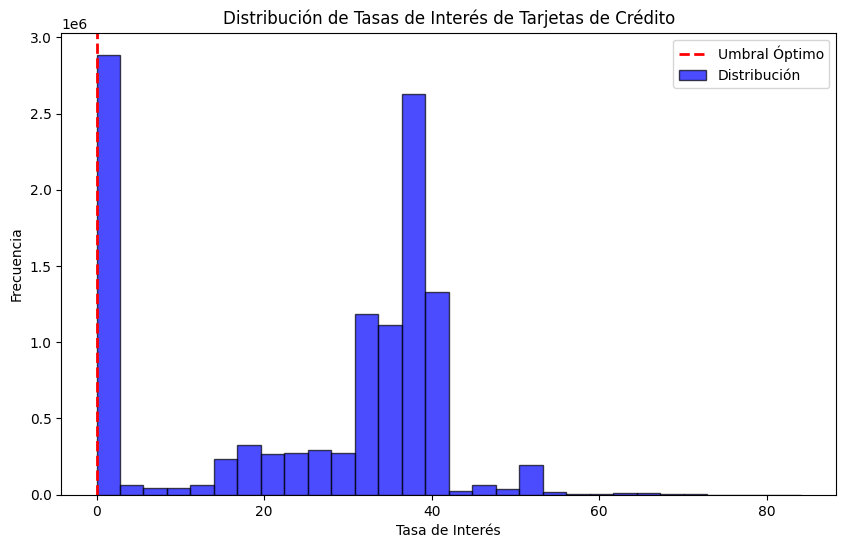

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Función de costo que evalúa la detección de outliers
def cost_function(data, threshold):
    outliers = [x for x in data if x > threshold]
    return len(outliers)  # Número de outliers detectados

# Inicialización de la población de abejas
def initialize_bees(n_bees, data):
    return np.random.uniform(min(data), max(data), n_bees)

# Selección de las mejores abejas
def select_best_bees(bees, data):
    costs = [cost_function(data, bee) for bee in bees]
    best_bees = [bees[i] for i in np.argsort(costs)[-5:]]  # Selecciona las 5 mejores
    return best_bees

# Apareamiento de las mejores abejas para generar nuevas soluciones
def mate_bees(best_bees):
    new_bees = []
    for i in range(len(best_bees)):
        for j in range(i + 1, len(best_bees)):
            # Promedia dos umbrales y agrega un pequeño ruido
            new_bee = (best_bees[i] + best_bees[j]) / 2 + np.random.normal(0, 0.1)
            new_bees.append(new_bee)
    return new_bees
def hbmo(data, n_bees=20, max_iter=100):
    # Inicializa la población de abejas
    bees = initialize_bees(n_bees, data)
    best_solution = None
    best_cost = float('-inf')

    for iter in range(max_iter):
        best_bees = select_best_bees(bees, data)
        new_bees = mate_bees(best_bees)

        # Actualiza la población
        bees = np.concatenate([best_bees, new_bees])

        # Encuentra la mejor solución actual
        current_best_cost = max([cost_function(data, bee) for bee in bees])
        if current_best_cost > best_cost:
            best_cost = current_best_cost
            best_solution = best_bees[np.argmax([cost_function(data, bee) for bee in best_bees])]

    return best_solution, best_cost
# Cargar los datos de tasas de interés de tarjetas de crédito
tasas_credito = pd.read_csv('TasasCredito_V12.csv')  # Reemplaza con el nombre de tu archivo
tasas = tasas_credito['tasa_efectiva_promedio_ponderada'].values  # Asegúrate de usar el nombre correcto de la columna

# Ejecutar el algoritmo HBMO
umbral_optimizado, costo = hbmo(tasas)

print(f"Umbral óptimo detectado: {umbral_optimizado}")
print(f"Número de outliers detectados: {costo}")
# Visualización de las tasas de interés y el umbral
plt.figure(figsize=(10, 6))
plt.hist(tasas, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(umbral_optimizado, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución de Tasas de Interés de Tarjetas de Crédito')
plt.xlabel('Tasa de Interés')
plt.ylabel('Frecuencia')
plt.legend(['Umbral Óptimo', 'Distribución'])
plt.show()

Comparación de resultados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, silhouette_score,
                             calinski_harabasz_score)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from scipy import stats

# Cargar el dataset
df = pd.read_csv('TasasCredito_V12.csv')

# Verificar valores NaN
print("Valores NaN por columna antes de limpiar:")
print(df.isnull().sum())

# Eliminar filas con NaN o imputar valores (puedes elegir una de las opciones)
df = df.dropna()  # O usa la siguiente línea para imputar con la media
# df['tasa_efectiva_promedio_ponderada'].fillna(df['tasa_efectiva_promedio_ponderada'].mean(), inplace=True)

# Verificar nuevamente
print("Valores NaN por columna después de limpiar:")
print(df.isnull().sum())

tasa_interes = df['tasa_efectiva_promedio_ponderada'].values

# Crear etiquetas de verdad para los outliers
z_scores = np.abs(stats.zscore(tasa_interes))
true_outliers = np.where(z_scores > 3, 1, 0)  # 1 para outlier, 0 para normal

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tasa_interes.reshape(-1, 1), true_outliers, test_size=0.2, random_state=42)

# Inicializar un diccionario para almacenar resultados
results = {}

# Evaluar Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# Calcular métricas para Isolation Forest
results['Isolation Forest'] = {
    'Precision': precision_score(y_test, y_pred_iso),
    'Recall': recall_score(y_test, y_pred_iso),
    'F1-Score': f1_score(y_test, y_pred_iso),
    'AUC': roc_auc_score(y_test, y_pred_iso),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_iso)
}

# Evaluar Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X_test)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

# Calcular métricas para LOF
results['Local Outlier Factor'] = {
    'Precision': precision_score(y_test, y_pred_lof),
    'Recall': recall_score(y_test, y_pred_lof),
    'F1-Score': f1_score(y_test, y_pred_lof),
    'AUC': roc_auc_score(y_test, y_pred_lof),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lof)
}

# Evaluar One-Class SVM
svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.01)
svm_model.fit(X_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

# Calcular métricas para SVM
results['One-Class SVM'] = {
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'AUC': roc_auc_score(y_test, y_pred_svm),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_svm)
}

# Evaluar KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)
y_pred_kmeans = np.where(y_pred_kmeans == 1, 1, 0)  # Asumimos que el cluster 1 contiene outliers

# Calcular métricas para KMeans
results['KMeans'] = {
    'Precision': precision_score(y_test, y_pred_kmeans),
    'Recall': recall_score(y_test, y_pred_kmeans),
    'F1-Score': f1_score(y_test, y_pred_kmeans),
    'AUC': roc_auc_score(y_test, y_pred_kmeans),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_kmeans),
    'Silhouette Score': silhouette_score(X_test, y_pred_kmeans),
    'Calinski-Harabasz Score': calinski_harabasz_score(X_test, y_pred_kmeans)
}

# Evaluar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X_test)
y_pred_dbscan = np.where(y_pred_dbscan == -1, 1, 0)

# Calcular métricas para DBSCAN
results['DBSCAN'] = {
    'Precision': precision_score(y_test, y_pred_dbscan),
    'Recall': recall_score(y_test, y_pred_dbscan),
    'F1-Score': f1_score(y_test, y_pred_dbscan),
    'AUC': roc_auc_score(y_test, y_pred_dbscan),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_dbscan),
    'Silhouette Score': silhouette_score(X_test, y_pred_dbscan),
    'Calinski-Harabasz Score': calinski_harabasz_score(X_test, y_pred_dbscan)
}

# Implementar K-Nearest Neighbors (KNN) para comparar
knn_model = KNeighborsClassifier(n_neighbors=5)
pipeline = make_pipeline(StandardScaler(), knn_model)
pipeline.fit(X_train, y_train)
y_pred_knn = pipeline.predict(X_test)

# Calcular métricas para KNN
results['KNN'] = {
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1-Score': f1_score(y_test, y_pred_knn),
    'AUC': roc_auc_score(y_test, y_pred_knn),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_knn)
}

# Mostrar resultados
for model, metrics in results.items():
    print(f"Resultados para {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

# Visualización de resultados
metrics_df = pd.DataFrame(results).T
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

# Configuración de la gráfica
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Gráfica de Barras para Precision, Recall y F1-Score
metrics_df_melted = metrics_df.melt(id_vars='Model', value_vars=['Precision', 'Recall', 'F1-Score'],
                                      var_name='Metric', value_name='Score')
sns.barplot(data=metrics_df_melted, x='Model', y='Score', hue='Metric', palette='muted')
plt.title('Comparación de Métricas de Modelos de Machine Learning')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.legend(title='Métricas')
plt.tight_layout()
plt.show()

# Gráfica de AUC
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='AUC', data=metrics_df, palette='muted')
plt.title('Área Bajo la Curva (AUC) por Modelo')
plt.xticks(rotation=45)
plt.ylabel('AUC Score')
plt.tight_layout()
plt.show()

# Gráfica de Matriz de Confusión
for model in results.keys():
    plt.figure(figsize=(6, 4))
    cm = results[model]['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Normal', 'Outlier'], yticklabels=['Normal', 'Outlier'])
    plt.title(f'Matriz de Confusión para {model}')
    plt.ylabel('Verdaderos')
    plt.xlabel('Predicciones')
    plt.show()

Valores NaN por columna antes de limpiar:
tipo_entidad                        0
codigo_entidad                      0
fecha_corte                         0
tipo_de_persona                     0
sexo                                0
tamano_de_empresa                   0
tipo_de_credito                     0
tipo_de_garantia                    0
producto_de_credito                 0
plazo_de_credito                    0
tasa_efectiva_promedio_ponderada    0
margen_adicional                    0
montos_desembolsados                0
numero_de_creditos_desembolsados    0
grupo_etnico                        0
antiguedad_de_la_empresa            0
tipo_de_tasa                        0
rango_monto_desembolsado            0
clase_deudor                        0
codigo_ciiu                         0
codigo_municipio                    0
dtype: int64
Valores NaN por columna después de limpiar:
tipo_entidad                        0
codigo_entidad                      0
fecha_corte                

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv('TasasCredito_V12.csv')

# Verificar valores NaN y eliminarlos o imputar con la media
print("Valores NaN por columna antes de limpiar:")
print(df.isnull().sum())
df = df.dropna()  # O imputar con la media
# df['tasa_efectiva_promedio_ponderada'].fillna(df['tasa_efectiva_promedio_ponderada'].mean(), inplace=True)

# Verificar nuevamente
print("Valores NaN por columna después de limpiar:")
print(df.isnull().sum())

# Crear etiquetas de verdad para los outliers
tasa_interes = df['tasa_efectiva_promedio_ponderada'].values
z_scores = np.abs(stats.zscore(tasa_interes))
true_outliers = np.where(z_scores > 3, 1, 0)

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    tasa_interes.reshape(-1, 1), true_outliers, test_size=0.2, random_state=42
)

Valores NaN por columna antes de limpiar:
tipo_entidad                        0
codigo_entidad                      0
fecha_corte                         0
tipo_de_persona                     0
sexo                                0
tamano_de_empresa                   0
tipo_de_credito                     0
tipo_de_garantia                    0
producto_de_credito                 0
plazo_de_credito                    0
tasa_efectiva_promedio_ponderada    0
margen_adicional                    0
montos_desembolsados                0
numero_de_creditos_desembolsados    0
grupo_etnico                        0
antiguedad_de_la_empresa            0
tipo_de_tasa                        0
rango_monto_desembolsado            0
clase_deudor                        0
codigo_ciiu                         0
codigo_municipio                    0
dtype: int64
Valores NaN por columna después de limpiar:
tipo_entidad                        0
codigo_entidad                      0
fecha_corte                

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Configuración de parámetros
batch_size = 10000  # Tamaño de cada partición de datos
X_batches = np.array_split(X_test, len(X_test) // batch_size)
y_batches = np.array_split(y_test, len(y_test) // batch_size)

# Función para calcular métricas
def evaluate_model(y_true, y_pred):
    return {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_pred),
        'Confusion Matrix': confusion_matrix(y_true, y_pred)
    }

# Inicializar diccionario de resultados
results = {}

# Isolation Forest con ajustes de parámetros
iso_forest = IsolationForest(n_estimators=200, max_samples='auto', contamination=0.05, random_state=42, n_jobs=-1)
iso_forest.fit(X_train)
iso_forest_results = [evaluate_model(y_batch, np.where(iso_forest.predict(X_batch) == -1, 1, 0)) for X_batch, y_batch in zip(X_batches, y_batches)]
results['Isolation Forest'] = iso_forest_results

# Local Outlier Factor (sin cambios)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, n_jobs=-1)
lof_results = [evaluate_model(y_batch, np.where(lof.fit_predict(X_batch) == -1, 1, 0)) for X_batch, y_batch in zip(X_batches, y_batches)]
results['Local Outlier Factor'] = lof_results

# One-Class SVM con ajustes de parámetros
svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
svm_model.fit(X_train)
svm_results = [evaluate_model(y_batch, np.where(svm_model.predict(X_batch) == -1, 1, 0)) for X_batch, y_batch in zip(X_batches, y_batches)]
results['One-Class SVM'] = svm_results

# KMeans (sin cambios)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=300)
kmeans.fit(X_train)
kmeans_results = [evaluate_model(y_batch, np.where(kmeans.predict(X_batch) == 1, 1, 0)) for X_batch, y_batch in zip(X_batches, y_batches)]
results['KMeans'] = kmeans_results

# DBSCAN con ajustes de parámetros (ajustar eps y min_samples para el dataset)
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_results = [evaluate_model(y_batch, np.where(dbscan.fit_predict(X_batch) == -1, 1, 0)) for X_batch, y_batch in zip(X_batches, y_batches)]
results['DBSCAN'] = dbscan_results

# KNN (sin cambios, pero utilizando un pipeline)
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
pipeline = make_pipeline(StandardScaler(), knn_model)
pipeline.fit(X_train, y_train)
knn_results = [evaluate_model(y_batch, pipeline.predict(X_batch)) for X_batch, y_batch in zip(X_batches, y_batches)]
results['KNN'] = knn_results

# Mostrar resultados
print(results)


{'Isolation Forest': [{'Precision': 0.11173184357541899, 'Recall': 1.0, 'F1-Score': 0.20100502512562815, 'AUC': 0.9770518618300779, 'Confusion Matrix': array([[9916,  477],
       [   0,   60]])}, {'Precision': 0.08785046728971962, 'Recall': 1.0, 'F1-Score': 0.16151202749140894, 'AUC': 0.9765519892369787, 'Confusion Matrix': array([[9918,  488],
       [   0,   47]])}, {'Precision': 0.10204081632653061, 'Recall': 1.0, 'F1-Score': 0.18518518518518517, 'AUC': 0.9767262935179842, 'Confusion Matrix': array([[9914,  484],
       [   0,   55]])}, {'Precision': 0.10371819960861056, 'Recall': 1.0, 'F1-Score': 0.1879432624113475, 'AUC': 0.9779807692307692, 'Confusion Matrix': array([[9942,  458],
       [   0,   53]])}, {'Precision': 0.08806262230919765, 'Recall': 1.0, 'F1-Score': 0.1618705035971223, 'AUC': 0.9776133743274404, 'Confusion Matrix': array([[9942,  466],
       [   0,   45]])}, {'Precision': 0.10097087378640776, 'Recall': 1.0, 'F1-Score': 0.18342151675485008, 'AUC': 0.9777425247572

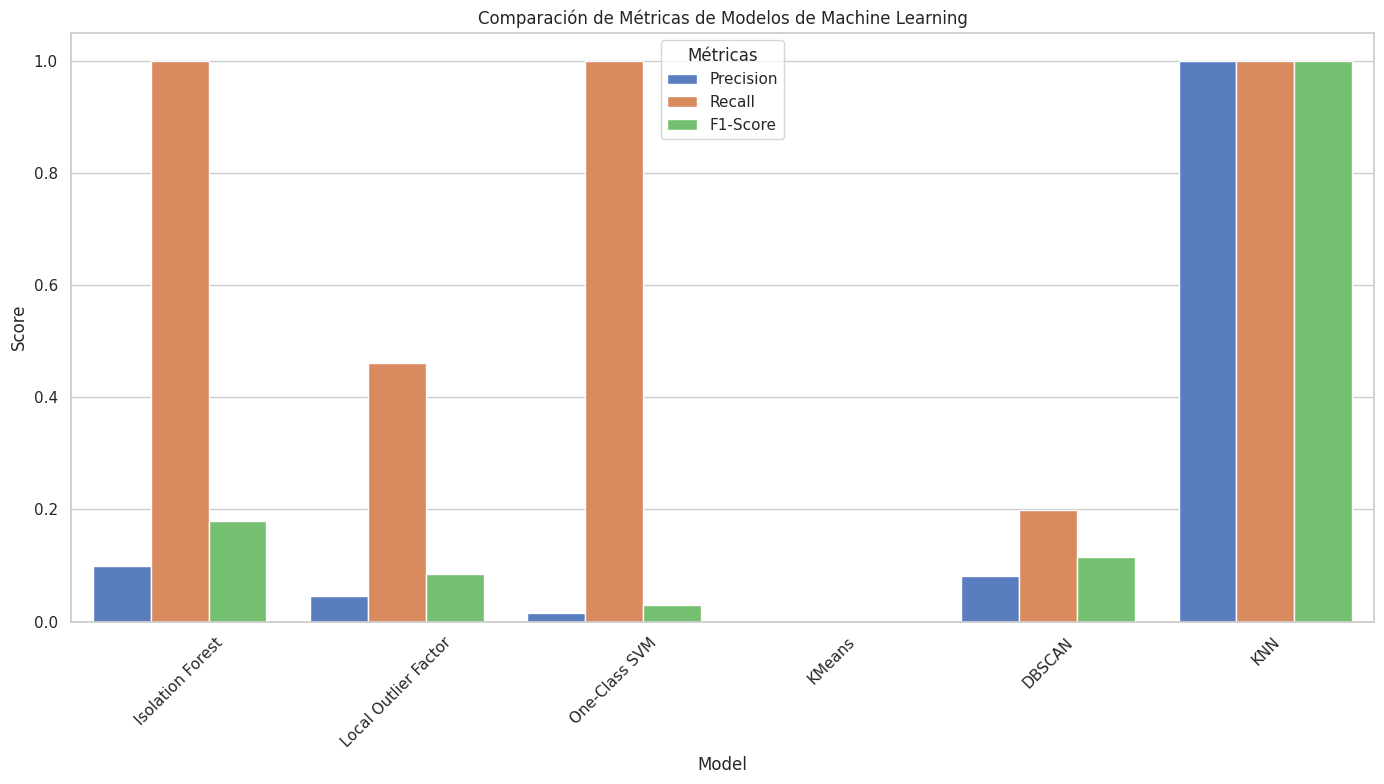

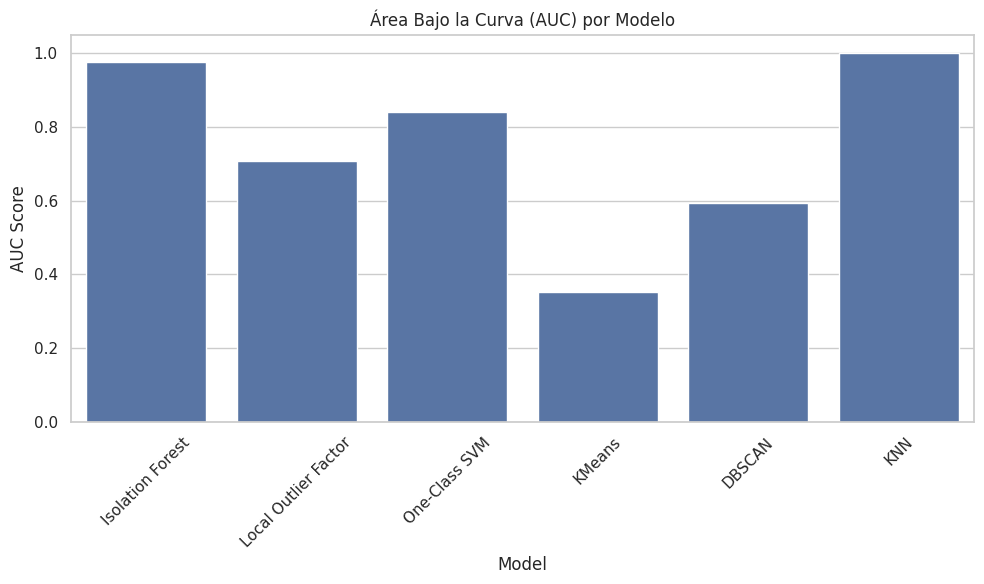

In [ ]:
import numpy as np
import pandas as pd

# Función para promediar métricas en cada partición
def average_metrics(partition_results):
    metrics_avg = {
        'Precision': np.mean([res['Precision'] for res in partition_results]),
        'Recall': np.mean([res['Recall'] for res in partition_results]),
        'F1-Score': np.mean([res['F1-Score'] for res in partition_results]),
        'AUC': np.mean([res['AUC'] for res in partition_results])
    }
    return metrics_avg

# Promediar las métricas por cada modelo
average_results = {model: average_metrics(results[model]) for model in results}

# Crear el DataFrame con los resultados promedio
metrics_df = pd.DataFrame(average_results).T
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica de Barras para Precision, Recall y F1-Score
metrics_df_melted = metrics_df.melt(id_vars='Model', value_vars=['Precision', 'Recall', 'F1-Score'],
                                    var_name='Metric', value_name='Score')
plt.figure(figsize=(14, 8))
sns.barplot(data=metrics_df_melted, x='Model', y='Score', hue='Metric', palette='muted')
plt.title('Comparación de Métricas de Modelos de Machine Learning')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.legend(title='Métricas')
plt.tight_layout()
plt.show()

# Gráfica de AUC (ajuste sin 'palette')
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='AUC', data=metrics_df)  # Removido el parámetro palette
plt.title('Área Bajo la Curva (AUC) por Modelo')
plt.xticks(rotation=45)
plt.ylabel('AUC Score')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('TasasCredito_V12.csv')

# Verificar valores NaN
print(df.isnull().sum())


tipo_entidad                        0
codigo_entidad                      0
fecha_corte                         0
tipo_de_persona                     0
sexo                                0
tamano_de_empresa                   0
tipo_de_credito                     0
tipo_de_garantia                    0
producto_de_credito                 0
plazo_de_credito                    0
tasa_efectiva_promedio_ponderada    0
margen_adicional                    0
montos_desembolsados                0
numero_de_creditos_desembolsados    0
grupo_etnico                        0
antiguedad_de_la_empresa            0
tipo_de_tasa                        0
rango_monto_desembolsado            0
clase_deudor                        0
codigo_ciiu                         0
codigo_municipio                    0
dtype: int64


Objetivo 3
 ●	Evaluar el modelo más eficaz para la detección de outliers mediante técnicas de validación cruzada y ajuste de hiperparámetros

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Error con el modelo One-Class SVM: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.00941324        nan        nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Resultados finales:
                     Precision   Recall  F1-Score       AUC  \
Isolation Forest      0.518116      1.0  0.682578  0.997675   
KNN                        1.0      1.0       1.0       1.0   
KMeans                     0.0      0.0       0.0       0.5   
Local Outlier Factor  0.014957  0.15035  0.027207  0.550422   

                                Confusion Matrix Mean F1-Score  
Isolation Forest        [[56940, 266], [0, 286]]      0.682578  
KNN                       [[57206, 0], [0, 286]]           1.0  
KMeans                    [[57206, 0], [286, 0]]           0.0  
Local Outlier Factor  [[54374, 2832], [243, 43]]      0.027207  

El mejor modelo es: KNN con métricas:
Precision                              1.0
Recall                                 1.0
F1-Score                               1.0
AUC                                    1.0
Confusion Matrix    [[57206, 0], [0, 286]]
Mean F1-Score                          1.0
Name: KNN, dtype: object


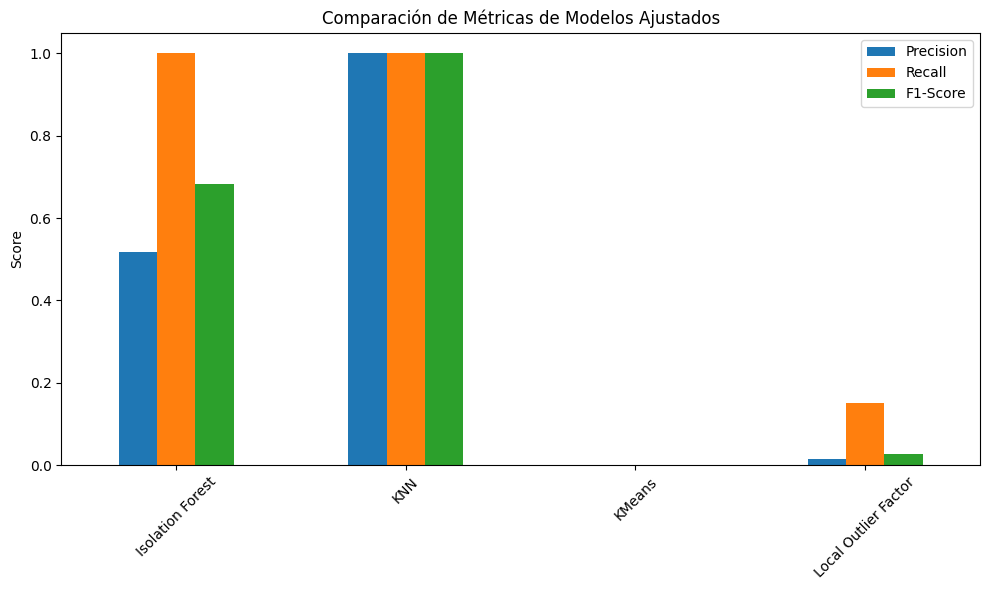

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.cluster import MiniBatchKMeans
from scipy import stats

# Cargar el dataset
df = pd.read_csv('TasasCredito_V12.csv')

# Imputar valores NaN
df.fillna({
    'tasa_efectiva_promedio_ponderada': df['tasa_efectiva_promedio_ponderada'].mean(),
    'margen_adicional': df['margen_adicional'].mean(),
    'montos_desembolsados': df['montos_desembolsados'].mean(),
    'tipo_de_persona': df['tipo_de_persona'].mode()[0],
    'sexo': df['sexo'].mode()[0]
}, inplace=True)

# Extraer la variable objetivo
tasa_interes = df['tasa_efectiva_promedio_ponderada'].values

# Crear etiquetas de verdad para los outliers usando Z-Score
z_scores = np.abs(stats.zscore(tasa_interes))
true_outliers = np.where(z_scores > 3, 1, 0)

# División de datos (80% para entrenamiento, 20% para pruebas)
X_train, X_test, y_train, y_test = train_test_split(tasa_interes.reshape(-1, 1), true_outliers, test_size=0.2, random_state=42)

# Definir los modelos y sus hiperparámetros
models = {
    'Isolation Forest': IsolationForest(random_state=42, n_jobs=-1),
    'One-Class SVM': OneClassSVM(kernel='rbf', gamma='scale'),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'KMeans': MiniBatchKMeans(random_state=42)
}

# Configuración del Local Outlier Factor (LOF)
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Definir el grid de hiperparámetros
param_grid = {
    'Isolation Forest': {'contamination': [0.01, 0.05, 0.1]},
    'One-Class SVM': {'nu': [0.01, 0.1, 0.5]},
    'KNN': {'n_neighbors': [3, 5, 7, 10]},
    'KMeans': {'n_clusters': [2, 3, 4]}
}

# Validación cruzada
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Resultados de los modelos
results = {}

# Bucle a través de cada modelo y ajuste
for model_name, model in models.items():
    try:
        if model_name in param_grid:
            # Reducir n_iter a 3 para evitar la advertencia
            grid_search = RandomizedSearchCV(model, param_grid[model_name], cv=kf, scoring='f1', n_jobs=-1, n_iter=3, random_state=42)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:
            best_model = model

        # Predicciones
        if model_name == 'KMeans':
            y_pred = best_model.fit_predict(X_test)
            y_pred = np.where(y_pred == -1, 1, 0)  # Ajustar etiquetas
        else:
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            if model_name == 'Isolation Forest':
                y_pred = np.where(y_pred == -1, 1, 0)  # Ajustar etiquetas para Isolation Forest

        # Calcular las métricas de evaluación asegurando que average sea 'binary'
        results[model_name] = {
            'Precision': precision_score(y_test, y_pred, average='binary'),
            'Recall': recall_score(y_test, y_pred, average='binary'),
            'F1-Score': f1_score(y_test, y_pred, average='binary'),
            'AUC': roc_auc_score(y_test, y_pred),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }
    except ValueError as e:
        print(f"Error con el modelo {model_name}: {e}")

# Local Outlier Factor sin GridSearchCV
y_pred_lof = lof_model.fit_predict(X_test)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)
results['Local Outlier Factor'] = {
    'Precision': precision_score(y_test, y_pred_lof, average='binary'),
    'Recall': recall_score(y_test, y_pred_lof, average='binary'),
    'F1-Score': f1_score(y_test, y_pred_lof, average='binary'),
    'AUC': roc_auc_score(y_test, y_pred_lof),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lof)
}

# Evaluación final
results_df = pd.DataFrame(results).T
results_df['Mean F1-Score'] = results_df['F1-Score']
best_model_name = results_df['Mean F1-Score'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

# Mostrar los resultados
print("Resultados finales:")
print(results_df)
print(f"\nEl mejor modelo es: {best_model_name} con métricas:")
print(best_model_metrics)

# Visualización de resultados
plt.figure(figsize=(10, 6))
results_df[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=plt.gca())
plt.title('Comparación de Métricas de Modelos Ajustados')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.tight_layout()
plt.show()
